# Produisez une √©tude de march√©

# Sc√©nario
Votre entreprise **d'agroalimentaire** souhaite se d√©velopper √† l'international. Elle est sp√©cialis√©e dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **√† cibler plus particuli√®rement certains pays**, dans le but d'approfondir ensuite l'√©tude de march√©. Plus particuli√®rement, l'id√©al serait de produire des "groupes" de pays, plus ou moins gros, dont on conna√Æt les caract√©ristiques.

Dans un premier temps, la strat√©gie est plut√¥t d'exporter les produits plut√¥t que de produire sur place, c'est-√†-dire dans le(s) nouveau(x) pays cibl√©(s).


Pour identifier les pays propices √† une insertion dans le march√© du poulet,
 Il vous a √©t√© demand√© de cibler les pays. 
 Etudier les r√©gimes alimentaires de chaque pays, notamment en termes de prot√©ines d'origine animale et en termes de calories.


Construisez votre √©chantillon contenant l'ensemble des pays disponibles, chacun caract√©ris√© par ces variables :

diff√©rence de population entre une ann√©e ant√©rieure (au choix) et l'ann√©e courante, exprim√©e en pourcentage ;
proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays ;
disponibilit√© alimentaire en prot√©ines par habitant ;
disponibilit√© alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays √©tudi√©s, puis coupez-le afin d'obtenir 5 groupes.

Caract√©risez chacun de ces groupes selon les variables cit√©s pr√©c√©demment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centro√Ødes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays √† cibler, en pr√©sentant leurs caract√©ristiques. Un d√©coupage plus pr√©cis qu'en 5 groupes peut si besoin √™tre effectu√© pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. V√©rifiez donc qu'ils diff√®rent r√©ellement. Pour cela, r√©alisez les tests statistiques suivants :

un test d'ad√©quation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez d√©termin√©. Sur ces 2 clusters, testez la variable gaussienne gr√¢ce √† un test de comparaison.

In [281]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
from sklearn.cluster import KMeans
from sklearn import cluster


In [282]:
#Versions utilis√©es
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [283]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [284]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# Mission 1:  Construisez l'√©chantillon contenant l'ensemble des pays disponibles.
chacun caract√©ris√© par ces variables :

diff√©rence de population entre une ann√©e ant√©rieure (au choix) et l'ann√©e courante, exprim√©e en pourcentage ;
proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays ;
disponibilit√© alimentaire en prot√©ines par habitant ;
disponibilit√© alimentaire en calories par habitant.

## 1. La population par pays
la variation de la population entre 2009 et 2019, en %, qui sera positive en cas de croissance ou n√©gative en cas de baisse d√©mographique ;

Sources FAO (https://www.fao.org/faostat/fr/#data/OA)

In [285]:
df_population = pd.read_csv('datas/fao-populations_2019- 2009.csv' , header=0, sep=",", decimal=".")
df_population.head(2)

Code Domaine                       Domaine  Code zone (FAO)         Zone  \
0           OA  S√©ries temporelles annuelles                2  Afghanistan   
1           OA  S√©ries temporelles annuelles                2  Afghanistan   

   Code √âl√©ment            √âl√©ment  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   

   Code ann√©e  Ann√©e           Unit√©     Valeur Symbole  \
0        2009   2009  1000 personnes  28394.813       X   
1        2019   2019  1000 personnes  38041.754       X   

          Description du Symbole Note  
0  Sources internationales s√ªres  NaN  
1  Sources internationales s√ªres  NaN

In [286]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Ann√©e', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

Code zone (FAO)            Zone                 Produit  Ann√©e      Valeur
0                2     Afghanistan  Population-Estimations   2009  28394813.0
1                2     Afghanistan  Population-Estimations   2019  38041754.0
2              202  Afrique du Sud  Population-Estimations   2009  50477011.0
3              202  Afrique du Sud  Population-Estimations   2019  58558270.0
4                3         Albanie  Population-Estimations   2009   2973048.0

In [287]:
#pivot
df_population = df_population.pivot_table(index=['Zone'], columns='Ann√©e', values = 'Valeur', aggfunc = sum).reset_index()

#rename
df_population.columns = ['Zone', '2009', '2019']

#variable creation
df_population['√âvolution population (%)'] = round((df_population['2019'] - df_population['2009']) /
                                               df_population['2019'] ,2)


population2009 = df_population['2009'].sum()
population2019 = df_population['2019'].sum()
evolution_globale = round(((population2019 - population2009) / population2009)*100,3)
print('Pour indication, la population totale en 2009 √©tait de', population2009, 'et de', population2019, 'en 2019.\nL\'√©volution 2009/2019 est de', evolution_globale, '%.')


df_population= df_population.rename(columns= {'2019': 'population',})
df_population= df_population[[ 'Zone' , 'population' ,'√âvolution population (%)']]

#show

df_population


Pour indication, la population totale en 2009 √©tait de 8264492100.0 et de 9179381901.0 en 2019.
L'√©volution 2009/2019 est de 11.07 %.


Zone  population  √âvolution population (%)
0                  Afghanistan  38041754.0                      0.25
1               Afrique du Sud  58558270.0                      0.14
2                      Albanie   2880917.0                     -0.03
3                      Alg√©rie  43053054.0                      0.18
4                    Allemagne  83517045.0                      0.03
..                         ...         ...                       ...
233               √éles Salomon    669823.0                      0.23
234    √éles Turques-et-Ca√Øques     38191.0                      0.16
235   √éles Vierges am√©ricaines    104578.0                     -0.02
236  √éles Vierges britanniques     30030.0                      0.10
237      √éles Wallis-et-Futuna     11432.0                     -0.14

[238 rows x 3 columns]

In [288]:
df_population.shape

(238, 3)

## 2. Donn√©es sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantit√© de prot√©ines d‚Äôorigine animale et la quantit√© totale de prot√©ines consomm√©es ;

Sources FAO (http://www.fao.org/faostat/fr/#data)


In [289]:
df_dispo_alimentaire = pd.read_csv('datas/les bilans alimentaires 2019.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

Code Domaine                      Domaine  Code zone (FAO)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   

   Code ?l?ment                                            ?l?ment  \
0           664     Disponibilit? alimentaire (Kcal/personne/jour)   
1           674  Disponibilit? de prot?ines en quantit? (g/pers...   
2           664     Disponibilit? alimentaire (Kcal/personne/jour)   
3           674  Disponibilit? de prot?ines en quantit? (g/pers...   

   Code Produit           Produit  Code ann?e  Ann?e               Unit?  \
0          2901     Total General        2019   2019  Kcal/personne/jour   
1          2901     Total General        2019   2019     g/personne/jour   
2          2941  Produits Animaux        2019   2019  Kcal/personne/jour   
3          2941  Produits Animaux        2019   2019     g/personne/jour   

    Valeur Symbole Description du Symbole  
0  2273.00      Fc        Donn?e calcul?e  
1    57.31      Fc        Donn?e calcul?e  
2   187.00      Fc        Donn?e calcul?e  
3    10.34      Fc        Donn?e calcul?e

In [290]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=[ 'Zone'],
                                columns=['√âl√©ment', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

KeyError: '√âl√©ment'

In [291]:
df_dispo_alimentaire["ratio_proteines_animales(%)"] = round((df_dispo_alimentaire[('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Total General')]),2)
df_dispo_alimentaire

KeyError: ('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Produits Animaux')

## 3.  Les valeurs de PIB par habitant,
https://www.fao.org/faostat/fr/#data/FS

In [292]:
# Dataframes des donn√©es compl√©mentaires
# Indicateurs Macro (PIB et croissance)
df_PIB_habitant = pd.read_csv('datas/PIB par habitant.csv', header=0, sep=',', decimal='.')

df_PIB_habitant

Code Domaine            Domaine  Code zone (FAO)  \
0             MK  Indicateurs macro                2   
1             MK  Indicateurs macro              202   
2             MK  Indicateurs macro                3   
3             MK  Indicateurs macro                4   
4             MK  Indicateurs macro               79   
..           ...                ...              ...   
206           MK  Indicateurs macro              236   
207           MK  Indicateurs macro              237   
208           MK  Indicateurs macro              249   
209           MK  Indicateurs macro              251   
210           MK  Indicateurs macro              181   

                                       Zone  Code √âl√©ment  \
0                               Afghanistan          6119   
1                            Afrique du Sud          6119   
2                                   Albanie          6119   
3                                   Alg√©rie          6119   
4                                 Allemagne          6119   
..                                      ...           ...   
206  Venezuela (R√©publique bolivarienne du)          6119   
207                                Viet Nam          6119   
208                                   Y√©men          6119   
209                                  Zambie          6119   
210                                Zimbabwe          6119   

                      √âl√©ment  Code Produit                 Produit  \
0    Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
1    Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
2    Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
3    Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
4    Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
..                        ...           ...                     ...   
206  Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
207  Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
208  Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
209  Valeur US $ par habitant         22008  Produit Int√©rieur Brut   
210  Valeur US $ par habitant         22008  Produit Int√©rieur Brut   

     Code ann√©e  Ann√©e Unit√©        Valeur Symbole  \
0          2019   2019   US$    469.919090       X   
1          2019   2019   US$   6001.389576       X   
2          2019   2019   US$   5303.197823       X   
3          2019   2019   US$   3975.510381       X   
4          2019   2019   US$  46231.563366       X   
..          ...    ...   ...           ...     ...   
206        2019   2019   US$   4732.820093       X   
207        2019   2019   US$   2715.275874       X   
208        2019   2019   US$    855.066811       X   
209        2019   2019   US$   1292.482076       X   
210        2019   2019   US$   1463.985913       X   

            Description du Symbole  Note  
0    Sources internationales s√ªres   NaN  
1    Sources internationales s√ªres   NaN  
2    Sources internationales s√ªres   NaN  
3    Sources internationales s√ªres   NaN  
4    Sources internationales s√ªres   NaN  
..                             ...   ...  
206  Sources internationales s√ªres   NaN  
207  Sources internationales s√ªres   NaN  
208  Sources internationales s√ªres   NaN  
209  Sources internationales s√ªres   NaN  
210  Sources internationales s√ªres   NaN  

[211 rows x 15 columns]

In [248]:
df_PIB_habitant = df_PIB_habitant[['Zone','√âl√©ment','Valeur','Produit']]
df_PIB_habitant = df_PIB_habitant.pivot_table(index=['Zone'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()
df_PIB_habitant = df_PIB_habitant.rename(columns={'Produit Int√©rieur Brut':"PIB_par_habitant"})
                             
df_PIB_habitant

Produit                       Zone  PIB_par_habitant
0                      Afghanistan        469.919090
1                   Afrique du Sud       6001.389576
2                          Albanie       5303.197823
3                          Alg√©rie       3975.510381
4                        Allemagne      46231.563366
..                             ...               ...
206                      √éles Cook      21603.464347
207                  √éles Marshall       4038.170230
208                   √éles Salomon       1944.818169
209        √éles Turques-et-Ca√Øques      31353.460239
210      √éles Vierges britanniques      43188.619547

[211 rows x 2 columns]

## 4. Production viande de Volailles, taux d'autosuffisance
d√©fini en √©conomie comme le rapport entre les importations et la disponibilit√© int√©rieure du pays ;

https://www.fao.org/faostat/fr/#data/FBS

In [249]:
df_viande_volailles = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_viande_volailles.head(5)

Code Domaine                      Domaine  Code zone (FAO)            Zone  \
0          FBS  Bilans Alimentaires (2010-)                2     Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                2     Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                2     Afghanistan   
3          FBS  Bilans Alimentaires (2010-)              202  Afrique du Sud   
4          FBS  Bilans Alimentaires (2010-)              202  Afrique du Sud   

   Code √âl√©ment                   √âl√©ment  Code Produit              Produit  \
0          5511                Production          2734  Viande de Volailles   
1          5611   Importations - Quantit√©          2734  Viande de Volailles   
2          5301  Disponibilit√© int√©rieure          2734  Viande de Volailles   
3          5511                Production          2734  Viande de Volailles   
4          5611   Importations - Quantit√©          2734  Viande de Volailles   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2019   2019  Milliers de tonnes      28      Im   
1        2019   2019  Milliers de tonnes      44      Im   
2        2019   2019  Milliers de tonnes      67       S   
3        2019   2019  Milliers de tonnes    1816      Im   
4        2019   2019  Milliers de tonnes     488      Im   

                              Description du Symbole  
0  Donn√©es de la FAO bas√©es sur une m√©thodologie ...  
1  Donn√©es de la FAO bas√©es sur une m√©thodologie ...  
2                              Donn√©es standardis√©es  
3  Donn√©es de la FAO bas√©es sur une m√©thodologie ...  
4  Donn√©es de la FAO bas√©es sur une m√©thodologie ...

In [250]:
df_viande_volailles = df_viande_volailles.pivot_table(index=['Zone'],
                                columns=['√âl√©ment'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
#Le taux_suffisance= Production  √∑ (Production alimentaire domestique + importations „Éº exportations) √ó100
df_viande_volailles['taux_suffisance(Ÿ™)']=((df_viande_volailles['Production'] ) / 
                                           (df_viande_volailles['Disponibilit√© int√©rieure']))



#le taux de d√©pendance aux importations, d√©fini en √©conomie comme le rapport entre les importations et la disponibilit√© int√©rieure du pays ;

df_viande_volailles['taux_d√©pendance_importations(Ÿ™)']=(df_viande_volailles['Importations - Quantit√©'] / df_viande_volailles['Disponibilit√© int√©rieure'])


df_viande_volailles['Production'] = df_viande_volailles['Production']*1000000
df_viande_volailles['Importations'] = df_viande_volailles['Importations - Quantit√©']*1000000


df_viande_volailles = df_viande_volailles[['Zone','taux_suffisance(Ÿ™)','taux_d√©pendance_importations(Ÿ™)']]


df_viande_volailles

√âl√©ment                   Zone  taux_suffisance(Ÿ™)  \
0                  Afghanistan            0.417910   
1               Afrique du Sud            0.830741   
2                      Albanie            0.352941   
3                      Alg√©rie            1.013937   
4                    Allemagne            0.901869   
..                         ...                 ...   
175        √âmirats arabes unis            0.069337   
176                   √âquateur            0.996805   
177      √âtats-Unis d'Am√©rique            1.184659   
178                   √âthiopie            0.987179   
179               √éles Salomon            0.000000   

√âl√©ment  taux_d√©pendance_importations(Ÿ™)  
0                               0.656716  
1                               0.223239  
2                               0.647059  
3                               0.000000  
4                               0.485397  
..                                   ...  
175                             1.057011  
176                             0.000000  
177                             0.006375  
178                             0.012821  
179                             1.000000  

[180 rows x 3 columns]

**Le taux d'auto-suffisance alimentaire** est un indice permettant de mesurer l'importance de la production alimentaire d'un pays par rapport √† sa consommation int√©rieure.




In [251]:
df= pd.merge(df_population, df_dispo_alimentaire, on="Zone")

df = df[["Zone", 'population','√âvolution population (%)',
                                             ('Disponibilit√© alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Total General'),
                                            ('ratio_proteines_animales(%)', '')]]
df.rename(columns={('Disponibilit√© alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Total General'):'dispo_proteines',
                            ('ratio_proteines_animales(%)', ''):'ratio_proteines_animales(%)'},
                     inplace=True)



df['dispo_calories'] = df['dispo_calories']*365
df['dispo_proteines'] = df['dispo_proteines']*365


df= pd.merge(df, df_PIB_habitant, on="Zone")
df.head()


df= pd.merge(df, df_viande_volailles, on="Zone")
df.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Zone  population  √âvolution population (%)  dispo_calories  \
0     Afghanistan  38041754.0                      0.25          2273.0   
1  Afrique du Sud  58558270.0                      0.14          2898.0   
2         Albanie   2880917.0                     -0.03          3338.0   
3         Alg√©rie  43053054.0                      0.18          3493.0   
4       Allemagne  83517045.0                      0.03          3559.0   

   dispo_proteines  ratio_proteines_animales(%)  PIB_par_habitant  \
0            57.31                         0.18        469.919090   
1            79.77                         0.44       6001.389576   
2           116.02                         0.54       5303.197823   
3            90.84                         0.27       3975.510381   
4           104.24                         0.60      46231.563366   

   taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  
0            0.417910                         0.656716  
1            0.830741                         0.223239  
2            0.352941                         0.647059  
3            1.013937                         0.000000  
4            0.901869                         0.485397

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zone                             179 non-null    object 
 1   population                       179 non-null    float64
 2   √âvolution population (%)         178 non-null    float64
 3   dispo_calories                   179 non-null    float64
 4   dispo_proteines                  179 non-null    float64
 5   ratio_proteines_animales(%)      179 non-null    float64
 6   PIB_par_habitant                 179 non-null    float64
 7   taux_suffisance(Ÿ™)               177 non-null    float64
 8   taux_d√©pendance_importations(Ÿ™)  178 non-null    float64
dtypes: float64(8), object(1)
memory usage: 14.0+ KB


In [253]:
#Identifier la pr√©sence de doublons
print(df.duplicated().sum())


0


In [254]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

Zone  population  \
45                                 Djibouti    973560.0   
95                                 Maldives    530953.0   
149                                  Soudan  42813238.0   
168  Venezuela (R√©publique bolivarienne du)  28515829.0   

     √âvolution population (%)  dispo_calories  dispo_proteines  \
45                       0.15          2795.0            65.93   
95                       0.33          2212.0            80.01   
149                       NaN          2581.0            75.87   
168                      0.02          2204.0            51.55   

     ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
45                          0.20       3252.320409                 NaN   
95                          0.61      10626.484440                 NaN   
149                         0.26        815.060101            1.339286   
168                         0.44       4732.820093            1.000000   

     taux_d√©pendance_importations(Ÿ™)  
45                          1.000000  
95                          0.916667  
149                         0.000000  
168                              NaN

In [255]:
df=df.dropna()


In [256]:
df.describe()

population  √âvolution population (%)  dispo_calories  \
count  1.750000e+02                175.000000      175.000000   
mean   5.158291e+07                  0.117257     2894.588571   
std    1.879227e+08                  0.104614      456.179514   
min    5.282300e+04                 -0.240000     1707.000000   
25%    2.914598e+06                  0.050000     2582.000000   
50%    9.770529e+06                  0.110000     2883.000000   
75%    3.188754e+07                  0.190000     3298.500000   
max    1.465634e+09                  0.420000     3862.000000   

       dispo_proteines  ratio_proteines_animales(%)  PIB_par_habitant  \
count       175.000000                   175.000000        175.000000   
mean         81.891829                     0.427657      14443.920020   
std          21.016290                     0.160487      20010.263467   
min          25.910000                     0.060000        260.381563   
25%          65.395000                     0.290000       1879.657770   
50%          82.240000                     0.440000       6108.558032   
75%          97.365000                     0.560000      17247.236109   
max         143.940000                     0.750000     115480.867570   

       taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  
count          175.000000                       175.000000  
mean             0.783882                         0.442286  
std              0.652157                         0.502782  
min              0.000000                         0.000000  
25%              0.343137                         0.044570  
50%              0.875000                         0.268657  
75%              1.014322                         0.787968  
max              6.953020                         4.040268

In [257]:
#Retrait du pays 'France' sur notre √©chantillon 
df = df[df['Zone'] != 'France']

In [258]:
#Calcul de fr√©quence en Chine
df[df['Zone'].str.contains('hin')]

Zone    population  √âvolution population (%)  \
32                     Chine  1.465634e+09                      0.05   
33  Chine - RAS de Hong-Kong  7.436154e+06                      0.07   
34      Chine - RAS de Macao  6.404450e+05                      0.18   
35       Chine, continentale  1.433784e+09                      0.05   

    dispo_calories  dispo_proteines  ratio_proteines_animales(%)  \
32          3340.0           105.11                         0.40   
33          3236.0           129.45                         0.75   
34          3312.0           107.31                         0.64   
35          3347.0           105.30                         0.39   

    PIB_par_habitant  taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  
32      10238.512141            0.991069                         0.084822  
33      49180.094302            0.043182                         1.756818  
34      84096.705446            0.136364                         1.454545  
35      10003.555003            1.022049                         0.039748

In [259]:
#Supprimer la ligne Chine
df = df[df['Zone'] != 'Chine']



In [260]:
#V√©rification d'√©ventuelles valeurs manquantes et/ou en doubles dans l'√©chantillon
print(df.duplicated().sum())
print(df.isna().sum())

0
Zone                               0
population                         0
√âvolution population (%)           0
dispo_calories                     0
dispo_proteines                    0
ratio_proteines_animales(%)        0
PIB_par_habitant                   0
taux_suffisance(Ÿ™)                 0
taux_d√©pendance_importations(Ÿ™)    0
dtype: int64


In [261]:
df= df.rename(columns={'Zone': 'pays'} )

In [262]:
df.style.background_gradient(cmap='BrBG')


In [263]:
df.shape

(173, 9)

In [264]:
df.to_csv('exports/df.csv', index=False)

In [265]:
df = df[df['pays'] != 'Pays-Bas']

# Mission 2 : r√©alisation d'un dendrogramme

Construisez un dendrogramme contenant l'ensemble des pays √©tudi√©s, puis coupez-le afin d'obtenir 5 groupes.

Caract√©risez chacun de ces groupes selon les variables cit√©s pr√©c√©demment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centro√Ødes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays √† cibler, en pr√©sentant leurs caract√©ristiques. Un d√©coupage plus pr√©cis qu'en 5 groupes peut si besoin √™tre effectu√© pour cibler un nombre raisonnable de pays. 


# Environnement


In [266]:
#pays comme index
df_clus=df.set_index('pays', drop=True, append=False, inplace=False, verify_integrity=False)

# pr√©paration des donn√©es pour le clustering
df_clus = df_clus[["√âvolution population (%)", "dispo_calories",
                                 "dispo_proteines","ratio_proteines_animales(%)",
                                 'PIB_par_habitant','taux_suffisance(Ÿ™)','taux_d√©pendance_importations(Ÿ™)']]

df_clus.head(2)


√âvolution population (%)  dispo_calories  dispo_proteines  \
pays                                                                        
Afghanistan                         0.25          2273.0            57.31   
Afrique du Sud                      0.14          2898.0            79.77   

                ratio_proteines_animales(%)  PIB_par_habitant  \
pays                                                            
Afghanistan                            0.18        469.919090   
Afrique du Sud                         0.44       6001.389576   

                taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  
pays                                                                 
Afghanistan               0.417910                         0.656716  
Afrique du Sud            0.830741                         0.223239

# Aper√ßu des corr√©lations

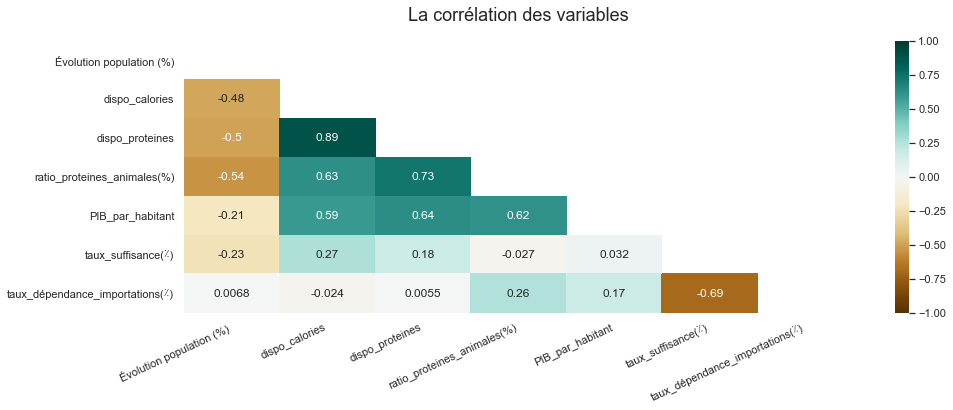

In [267]:
plt.figure(figsize=(15,5))

mask = np.zeros_like(df_clus.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_clus.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.xticks(rotation=25, ha='right')
plt.title('La corr√©lation des variables',  fontsize=18, pad=20)

plt.show()

# Observations

D'apr√®s le tableau de corr√©lation color√© ci-dessus, on peut constater une corr√©lation positive  forte entre la disponibilit√© alimentaire en prot√©ine par personnes et celle en kcal par personne .

On peut aussi  constater une corr√©lation positive  forte entre la pourcentage de prot√©ine d'origine animale et celle en kcal  , prot√©ines par personne et le PIB

Dans une moindre mesure, on retrouve √©galement une corr√©lation n√©gative entre le pourcentage d'√©volution de la population et les diff√©rents r√©gimes alimentaires des pays (prot√©ines, kcal, pourcentage de prot√©ine d'origine animale).

Nous sommes int√©ress√©s par les pays les plus susceptibles de consommer du poulet, donc ceux ayant un fort ratio de prot√©ines animales. Les corr√©lations montrent que ces pays sont susceptibles d'avoir un fort PIB, et de grandes disponibilit√©s en prot√©ines et calories.

# Clustering

## Classification des pays via Clustering Hi√©rarchique Ascendant (CHA)

La classification sera √©tablie sur la base des variables suivantes :

**La diff√©rence de population entre l'ann√©e 2013 et l'ann√©e 2019, exprim√©e en pourcentage;\
La proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays;\
La disponibilit√© alimentaire en grammes de prot√©ines par habitant ;\
La disponibilit√© alimentaire en Kcal par habitant.\
PIB par habitant.\
Rapport de d√©pendance √† l'importation.\
La taux suffisance(Ÿ™).\**

L'√©chantillon comporte peu de variables sur la dimension dite du "R√©gime alimentaire", il comporte √©galement un nombre de pays "ma√Ætrisables" qui permet de commencer par une classification hi√©rarchique. Algorithme qui a une forte complexit√© algorithmique en temps et en espace, le clustering hi√©rarchique est recommand√© pour les petits √©chantillons.


# Premier clustering

Le partitionnement ou clustering a pour objectif de cr√©er des groupes d‚Äôobservations homog√®nes.

Au pr√©alable, il est n√©cessaire de centrer-r√©duire les donn√©es. C‚Äôest √† dire, recalculer chaque valeur de mani√®re √† ce que la moyenne de la variable soit √©gale √† 0 et la variance et l‚Äô√©cart-type √©galent 1. Pour une variable donn√©e, on soustrait √† chaque valeur la moyenne de la variable, puis on divise le tout par l‚Äô√©cart-type.

Ensuite, nous pouvons proc√©der √† la classification ascendante hi√©rarchique selon la m√©thode de Ward. **L‚Äôobjectif est de regrouper des pays similaires.**

In [268]:
# dans array numpy
X = df_clus.values 
pays = df_clus.index
#nous allons extraire les donn√©es d'expression de 172 pays  dans un tableau de donn√©es num√©riques .
 #X comporte uniquement les donn√©es  , il ne contient pas les √©tiquettes des √©chantillons.
 #Conservons les √©tiquettes de chaque √©chantillon  dans la variable pays.





In [269]:
# Centrage et R√©duction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
X_cr = std_scale.fit_transform(X)

#Standardisez les caract√©ristiques en supprimant la moyenne et en mettant √† l'√©chelle la variance unitaire.
#Le score standard d'un √©chantillon x est calcul√© comme suit¬†:
#z = (x - u) / s o√π
# u est la moyenne des √©chantillons d'apprentissage ou z√©ro si with_mean=False, 
# s est l'√©cart type des √©chantillons d'apprentissage ou un si with_std=False.


print('X_cr', X_cr.shape)
X_cr = pd.DataFrame(X_cr, index =df_clus.index, columns=df_clus.columns)
X_cr.head(2)

X_cr (172, 7)


√âvolution population (%)  dispo_calories  dispo_proteines  \
pays                                                                        
Afghanistan                     1.254842       -1.350758        -1.157091   
Afrique du Sud                  0.204328        0.027279        -0.080195   

                ratio_proteines_animales(%)  PIB_par_habitant  \
pays                                                            
Afghanistan                       -1.534301         -0.687846   
Afrique du Sud                     0.089698         -0.408565   

                taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  
pays                                                                 
Afghanistan              -0.719898                         0.549411  
Afrique du Sud            0.187724                        -0.474224

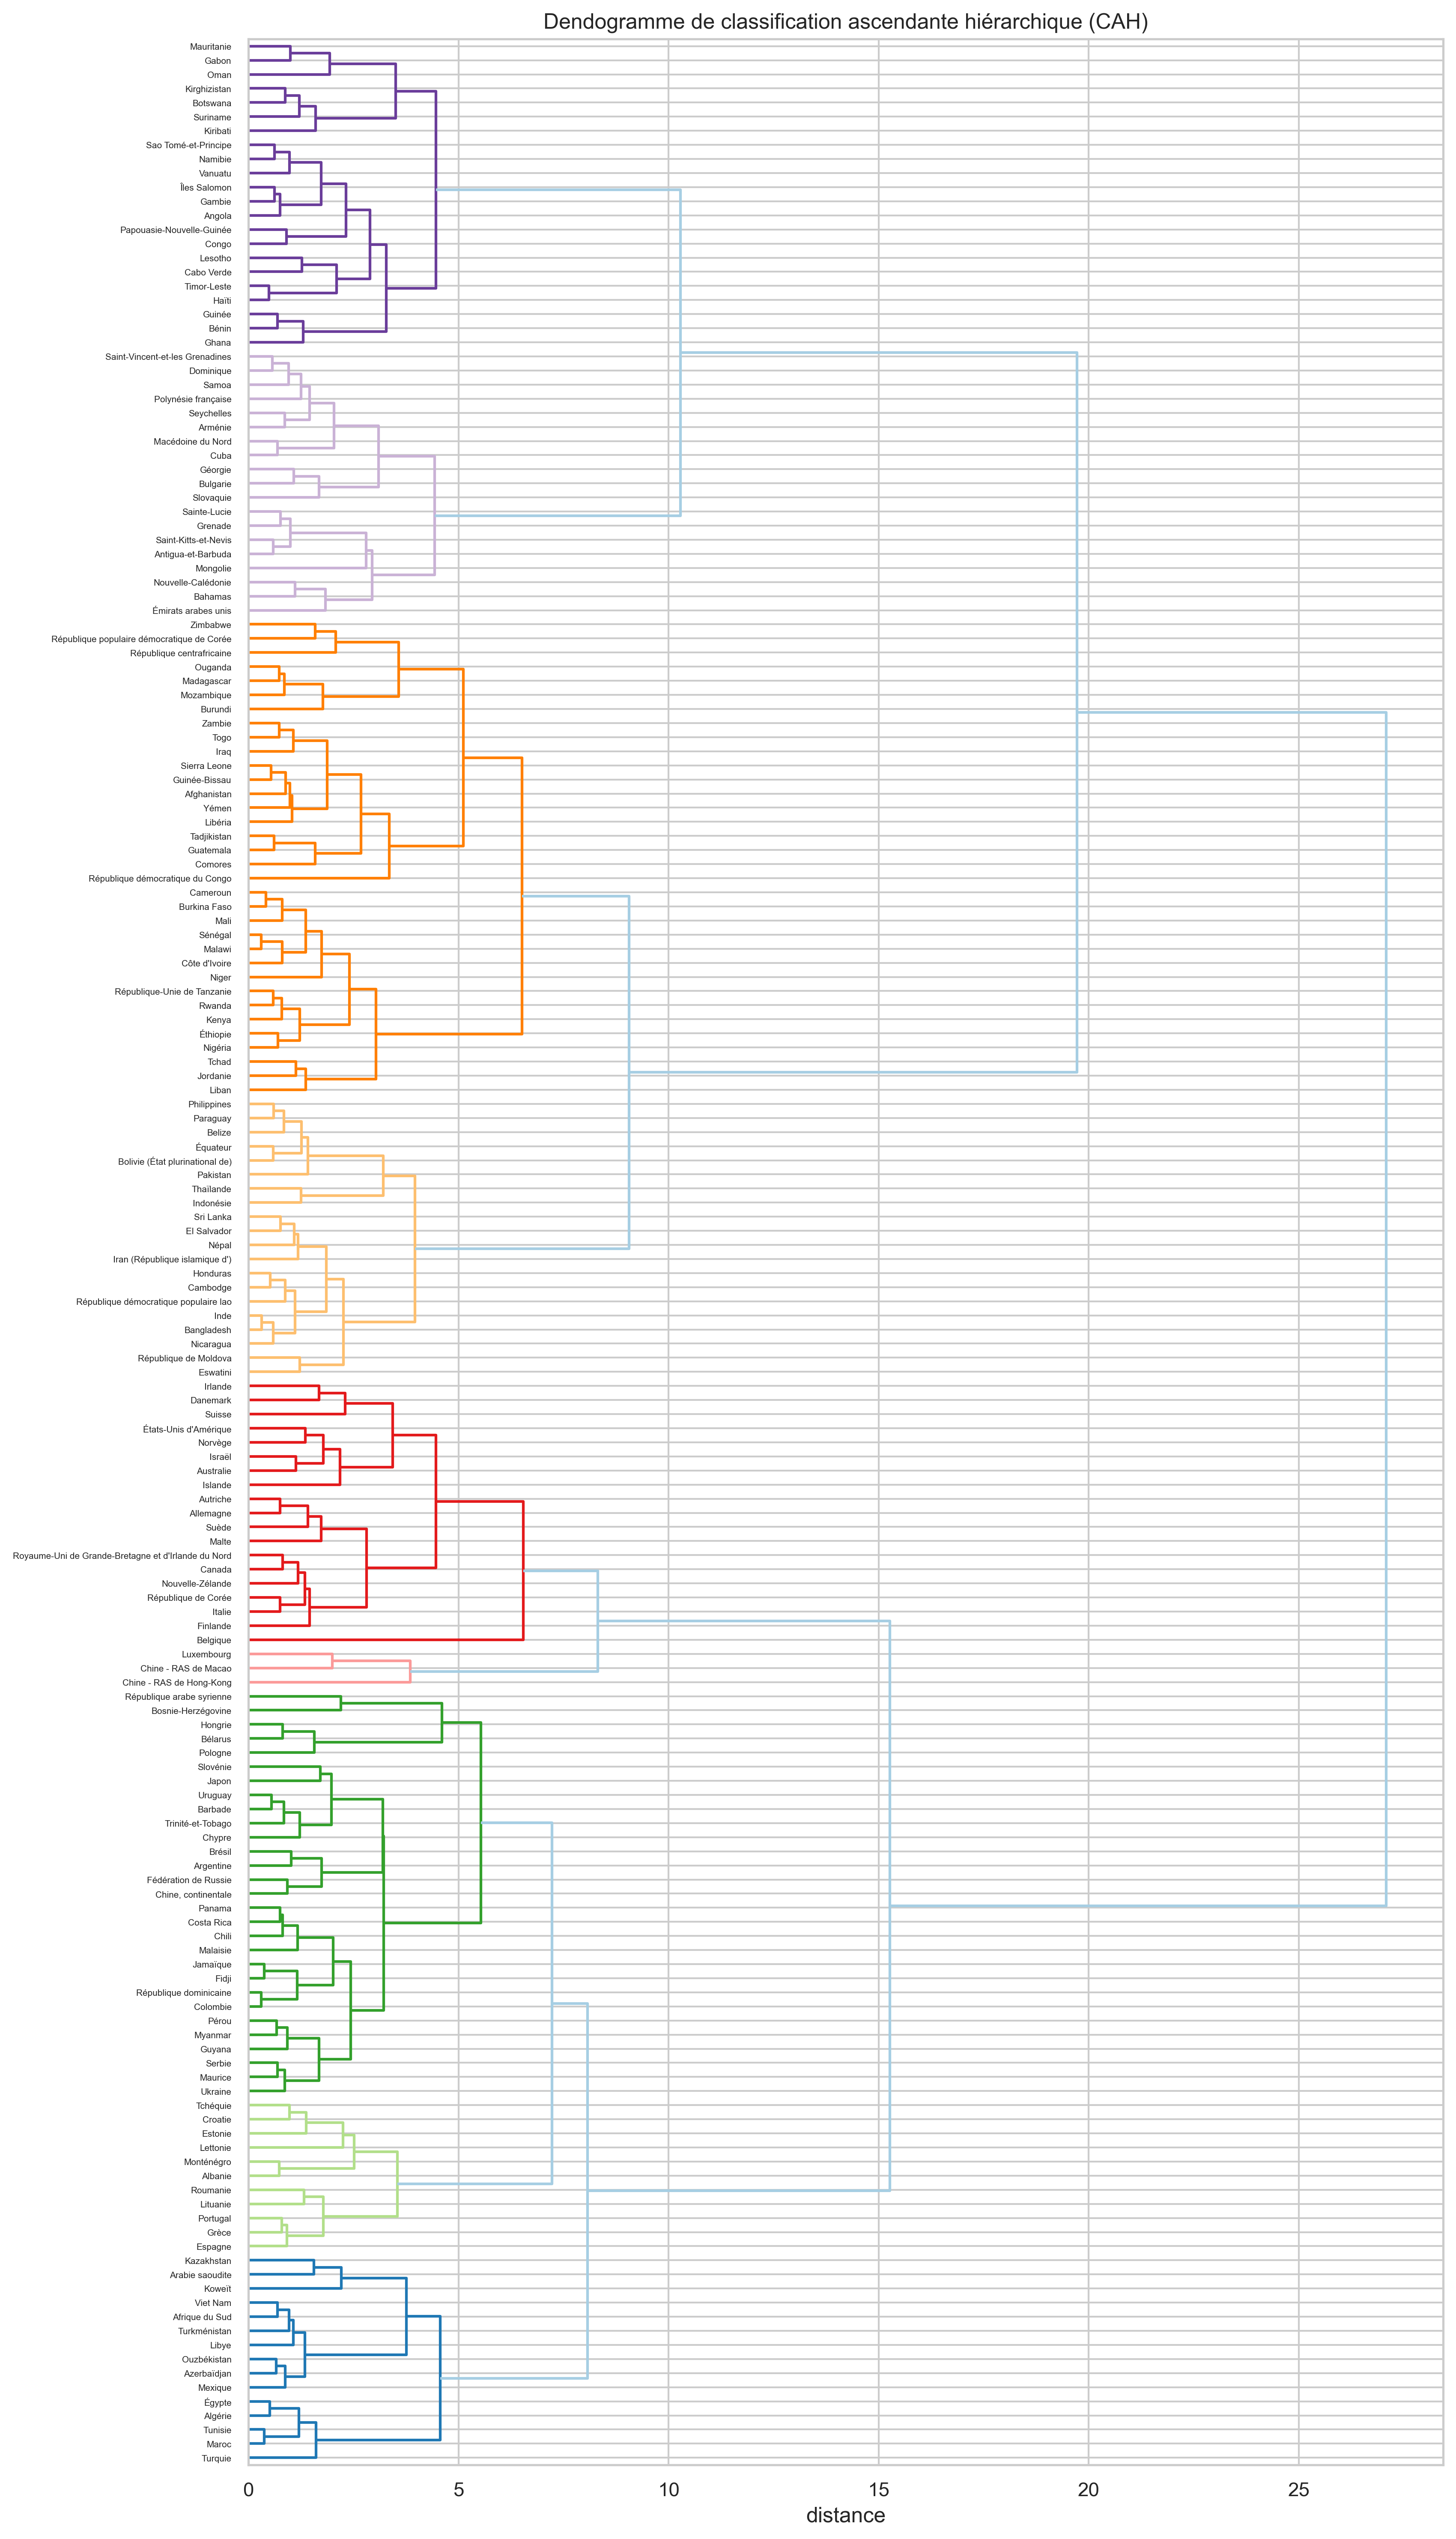

In [270]:
# Clustering hi√©rarchique avec librairie scipy
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
z=linkage(X_cr, method='ward' ,metric='euclidean')

# Affichage du dendogramme
plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hi√©rarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    z,#Regroupement hi√©rarchique encod√© avec la matrice renvoy√©e par la fonction de linkage.
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()

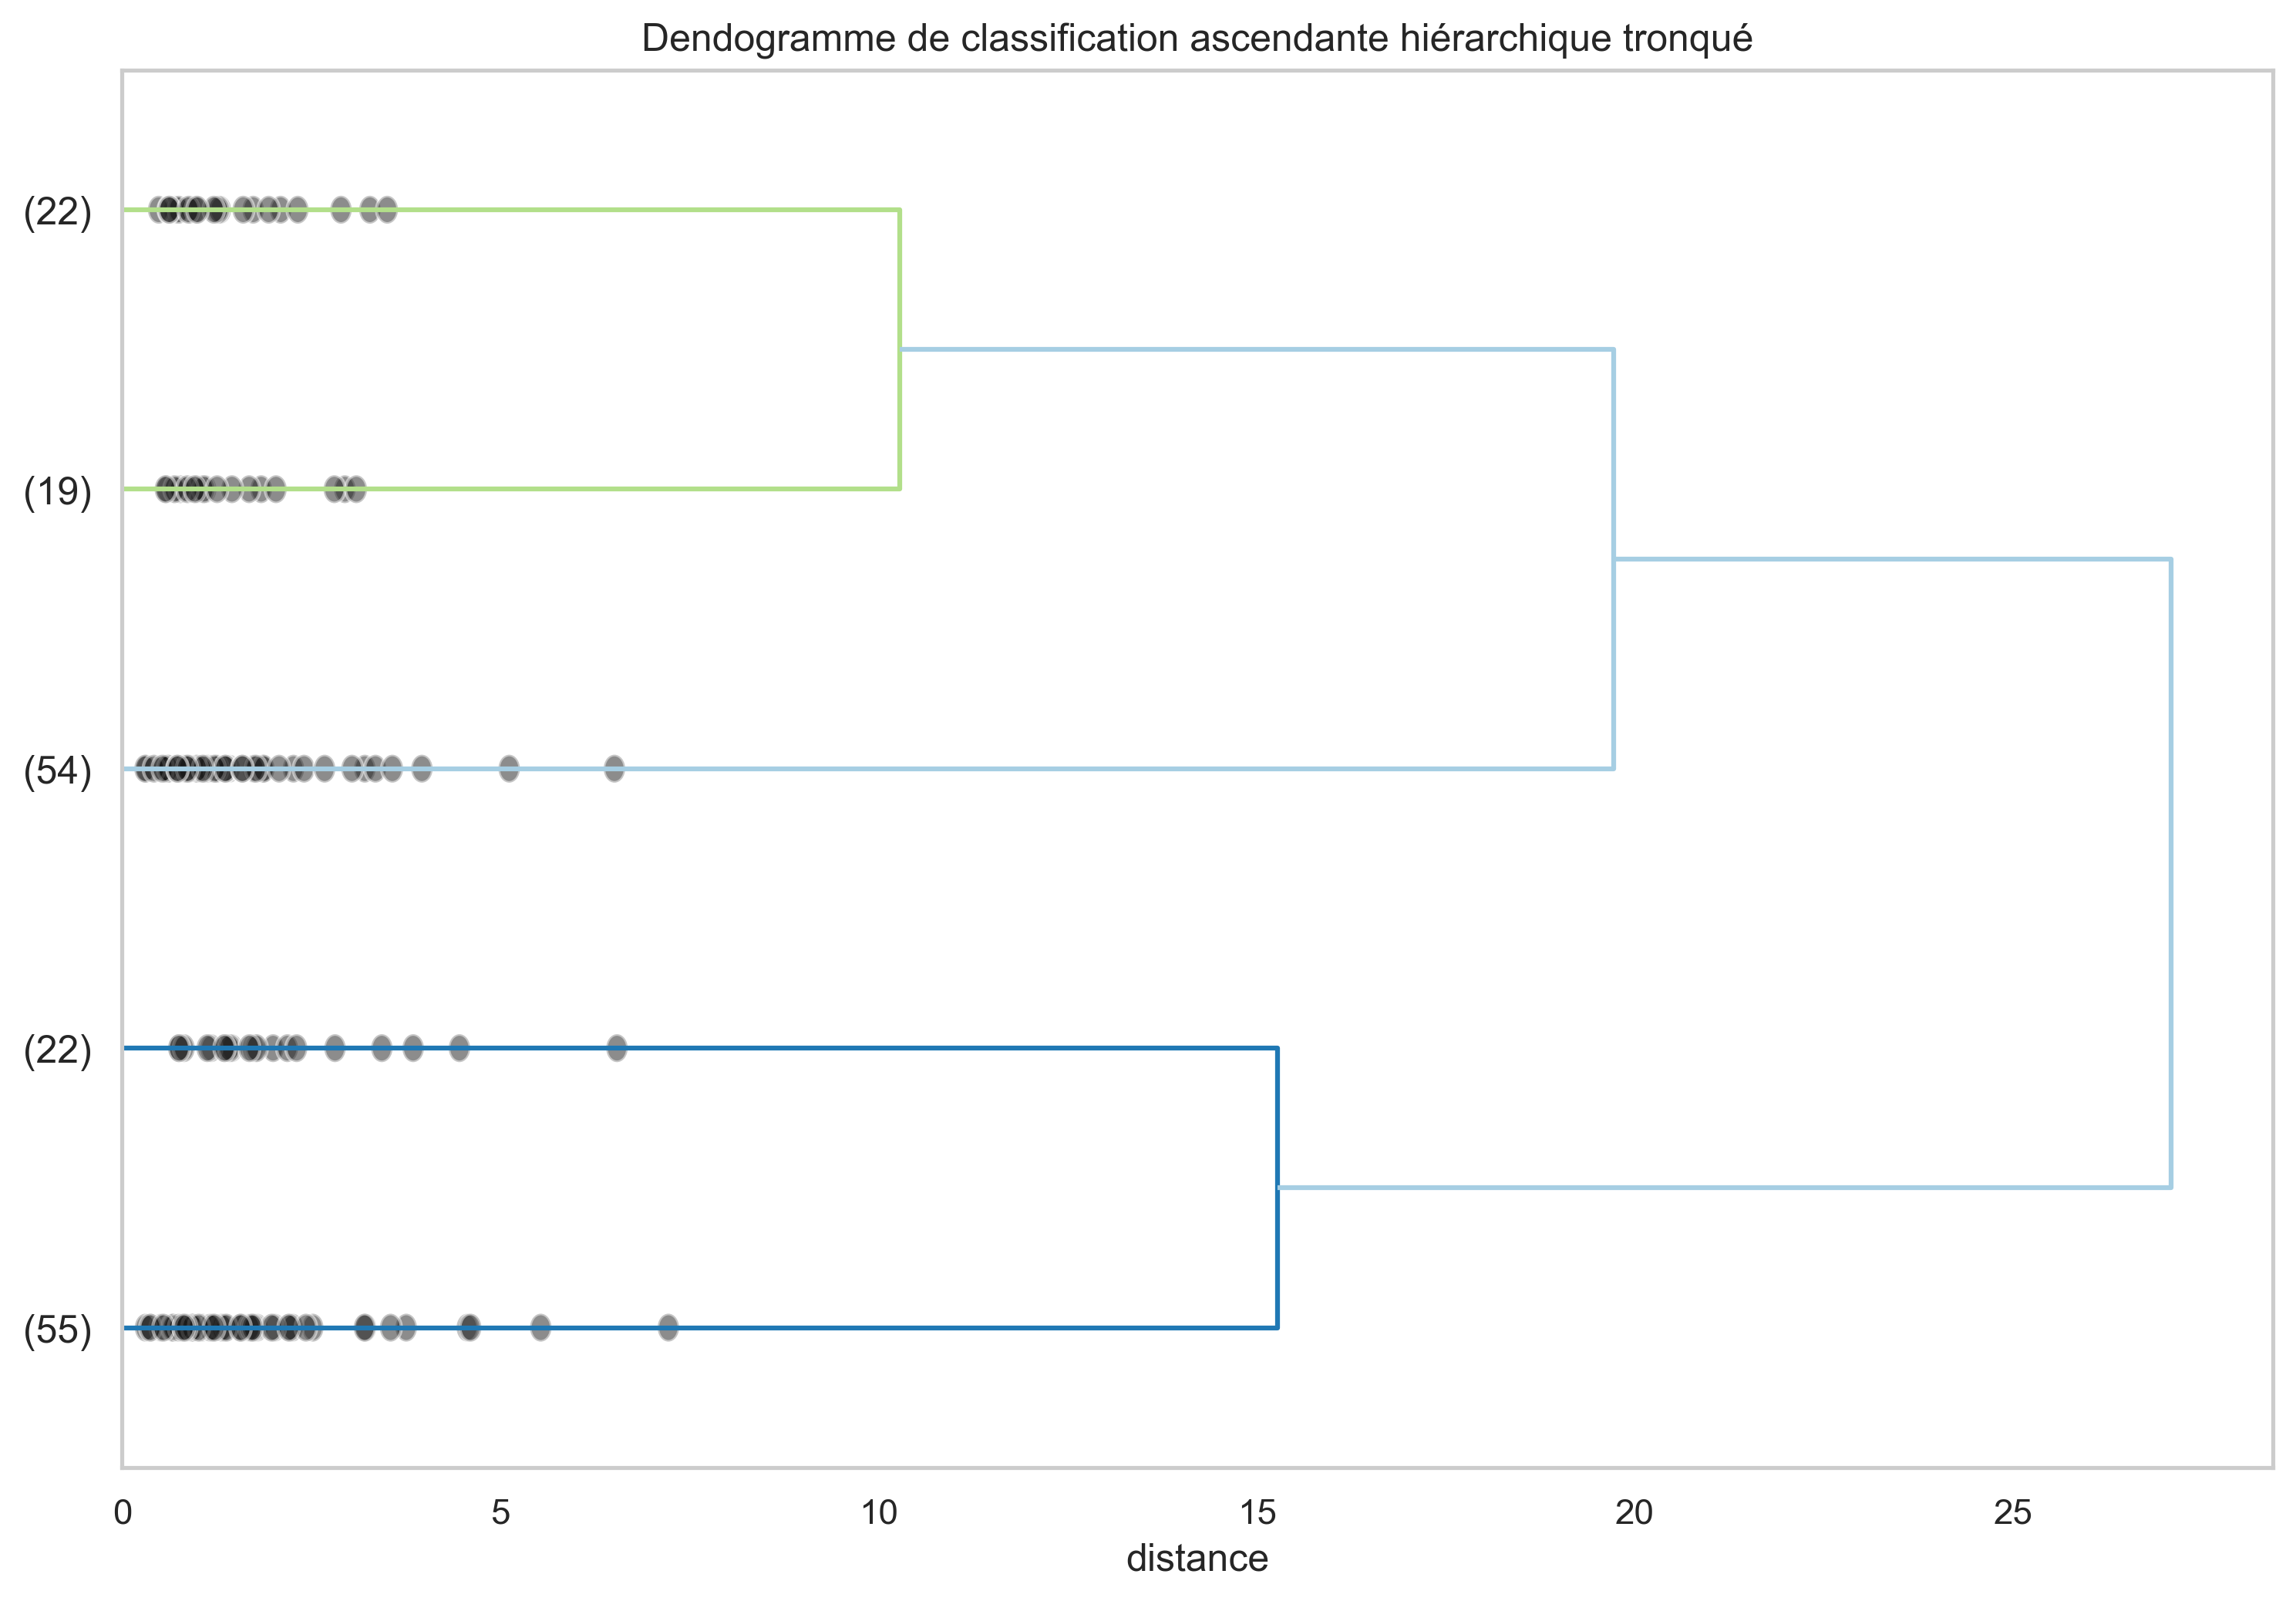

In [271]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hi√©rarchique tronqu√©')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),
    truncate_mode='lastp', #Les p derniers clusters non singleton form√©s dans la liaison sont les seuls n≈ìuds non feuilles dans la liaison¬†; 
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()



# Attribution des 5 groupes et World map de r√©partition

In [272]:
# Coupage du dendrogramme en 5 clusters avec Scipy
clusters_cah = fcluster(z, 5, criterion='maxclust')
#criterion , Crit√®re √† utiliser pour former des clusters plats. 
#maxclust : Trouve un seuil minimum r pour que la distance coph√©n√©tique entre deux observations originales quelconques dans le m√™me cluster plat ne soit pas sup√©rieure √† r et que pas plus de t clusters plats soient form√©s.

#index tri√©s des groupes
idg = np.argsort(clusters_cah)
#Renvoie les indices qui trieraient un tableau.

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["groupe_cah","pays"])
df_groupage_1["pays"] = df_clus.index[idg]
df_groupage_1["groupe_cah"] = clusters_cah[idg]
df_groupage_1

groupe_cah                       pays
0             1       F√©d√©ration de Russie
1             1                   Colombie
2             1                   Tch√©quie
3             1                      Maroc
4             1                 Costa Rica
..          ...                        ...
167           5  Papouasie-Nouvelle-Guin√©e
168           5                       Oman
169           5                 Mauritanie
170           5                Timor-Leste
171           5               √éles Salomon

[172 rows x 2 columns]

In [228]:
# Jointure pour ajout des groupes dans le dataframe principal
df_groupes_cah = pd.merge(df_clus, df_groupage_1, on="pays")
df_groupes_cah.to_csv('exports/df_groupes_cah.csv', index=False)
df_groupes_cah.sample(5)

pays  √âvolution population (%)  dispo_calories  \
155  Trinit√©-et-Tobago                      0.05          2959.0   
154               Togo                      0.23          2464.0   
61             G√©orgie                     -0.03          2860.0   
96          Mauritanie                      0.25          2875.0   
75            Jordanie                      0.32          2529.0   

     dispo_proteines  ratio_proteines_animales(%)  PIB_par_habitant  \
155            85.05                         0.52      16637.259813   
154            56.80                         0.17        899.490744   
61             79.11                         0.42       4439.323978   
96             82.92                         0.38       1677.917728   
75             63.72                         0.39       4405.480596   

     taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  groupe_cah  
155            0.696629                         0.280899           1  
154            0.647059                         0.367647           3  
61             0.323529                         0.794118           4  
96             0.166667                         1.033333           5  
75             0.780591                         0.261603           3

In [229]:
#Premi√®re comparaison des moyennes afin d'identifier le groupe de pays le plus porteur √† ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()

√âvolution population (%)  dispo_calories  dispo_proteines  \
groupe_cah                                                              
1                           0.051273     3171.309091        93.926364   
2                           0.084545     3483.590909       110.807273   
3                           0.189444     2477.796296        62.526111   
4                           0.055263     2880.578947        84.464737   
5                           0.201818     2578.863636        64.689545   

            ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
groupe_cah                                                                      
1                              0.491091      12274.514564            0.971417   
2                              0.612727      57414.265319            0.875417   
3                              0.264259       2277.822322            0.894792   
4                              0.555789      15203.205302            0.156274   
5                              0.358636       3363.658189            0.192090   

            taux_d√©pendance_importations(Ÿ™)  
groupe_cah                                   
1                                  0.247566  
2                                  0.506127  
3                                  0.163872  
4                                  0.961873  
5                                  0.957381

In [230]:
#Pr√©paration de sous-ensembles permettant de caract√©riser les groupes un √† un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 5]


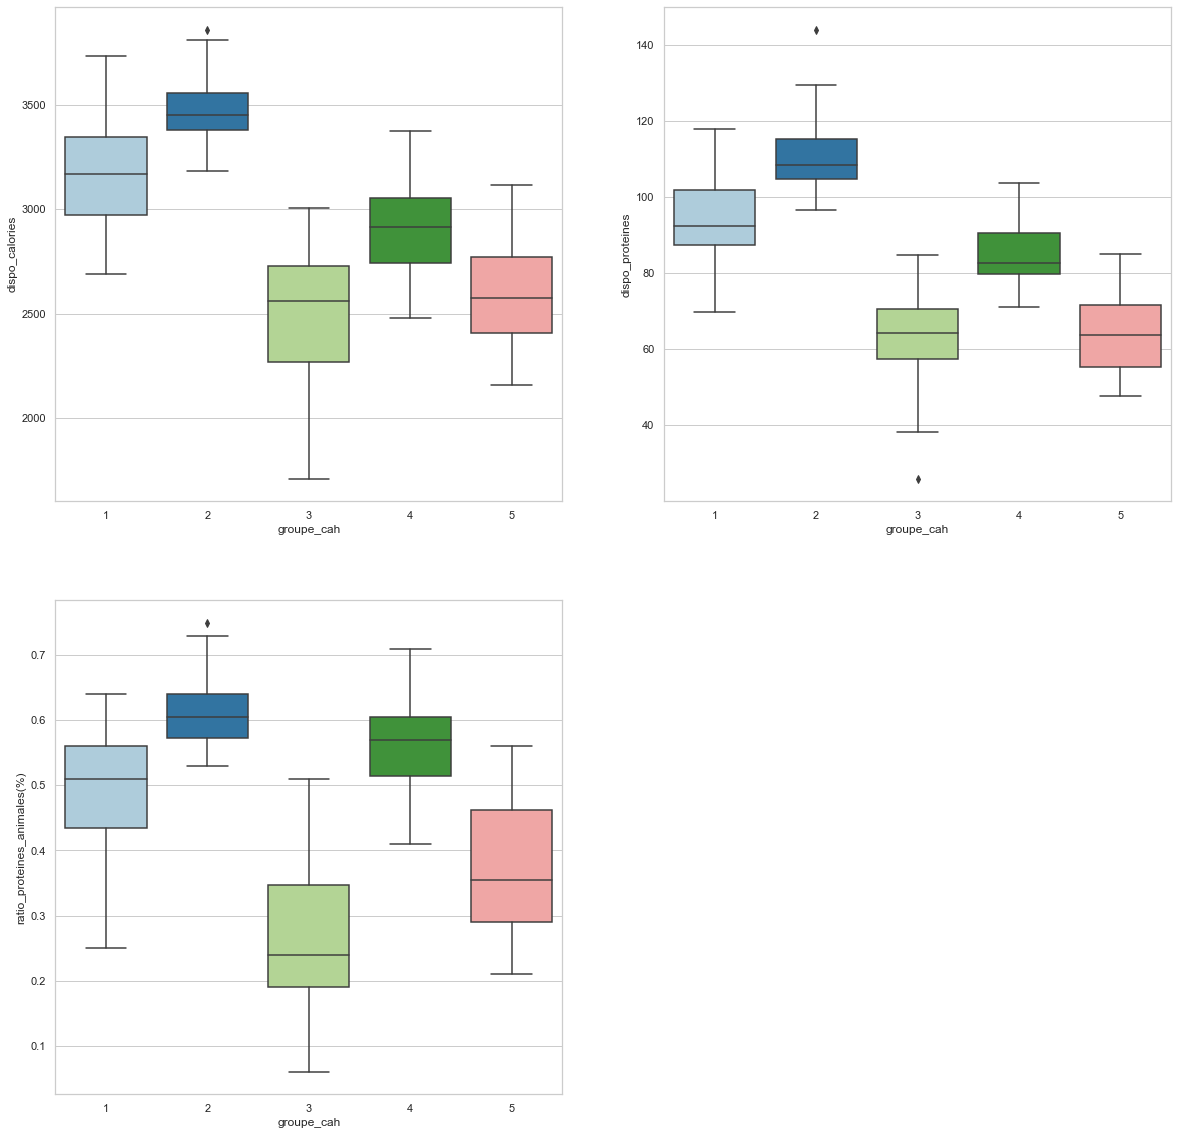

In [274]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='ratio_proteines_animales(%)')



plt.savefig("exports/boxplot_dendogramme1.png")

plt.show(block=False)

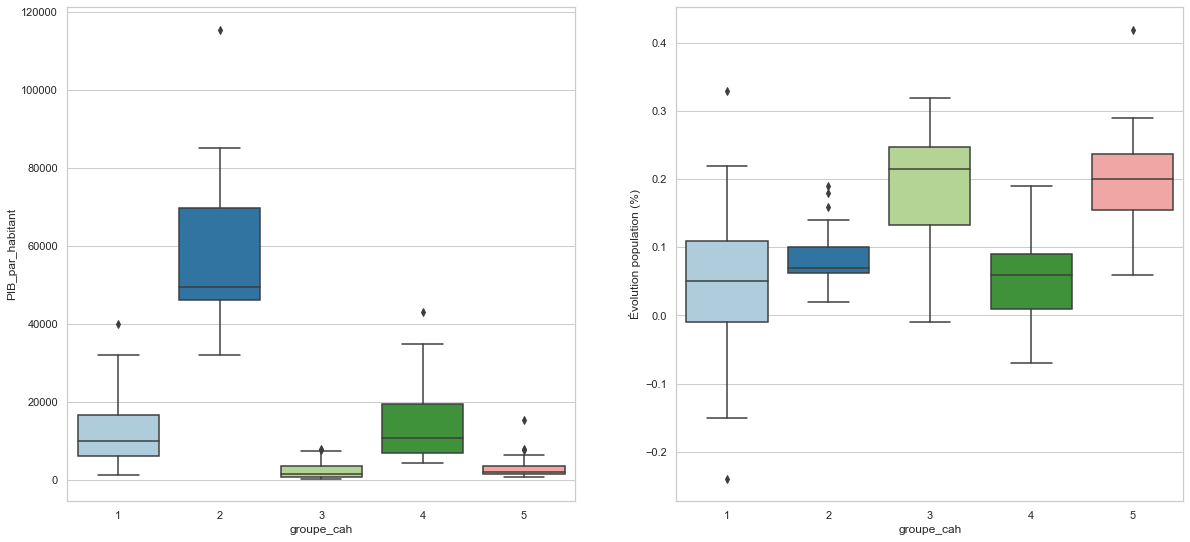

In [278]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='PIB_par_habitant')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='√âvolution population (%)')




plt.savefig("exports/boxplot_dendogramme2.png")

plt.show(block=False)

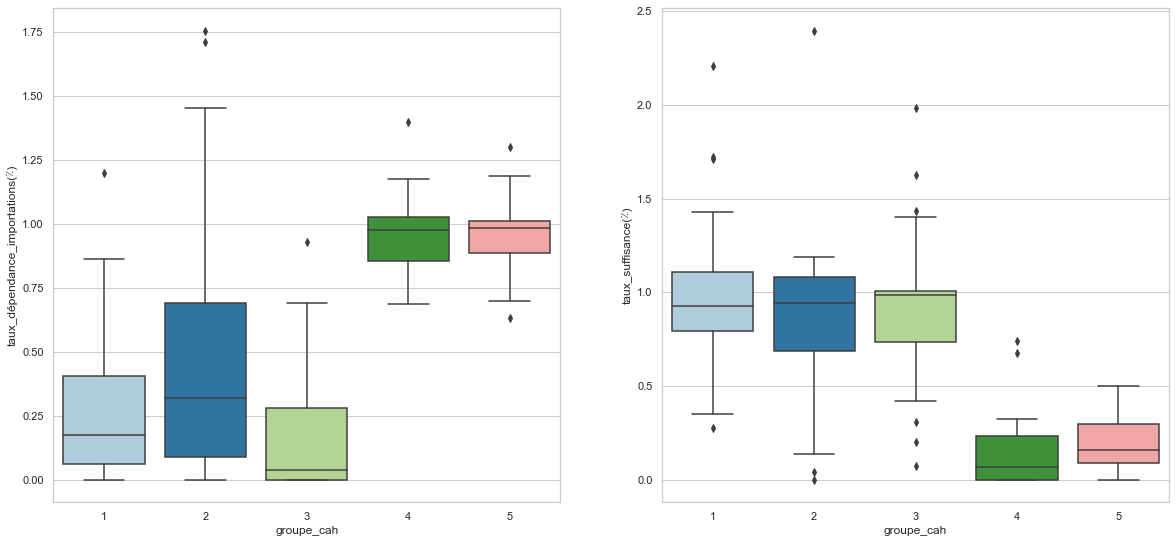

In [279]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))



plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_d√©pendance_importations(Ÿ™)')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_suffisance(Ÿ™)')



plt.savefig("exports/boxplot_dendogramme3.png")

plt.show(block=False)

In [280]:
df_select_pays_cah = df_groupes_cah[df_groupes_cah["groupe_cah"].isin([1,2]) == True]

df_select_pays_cah.to_csv('exports/df_select_pays_cah.csv', index=False)
df_select_pays_cah.shape

(55, 9)

In [277]:
#Pays du groupe 1 et 2 identifi√©s comme potentiellement int√©ressants

print('groupe 1')
print('----------')
print(df_groupe1_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 2')
print('----------')
print(df_groupe2_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 3')
print('----------')
print(df_groupe3_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 4')
print('----------')
print(df_groupe4_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 5')
print('----------')
print(df_groupe5_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')



groupe 1
----------
['Afrique du Sud' 'Albanie' 'Alg√©rie' 'Arabie saoudite' 'Argentine'
 'Azerba√Ødjan' 'Barbade' 'Bosnie-Herz√©govine' 'Br√©sil' 'B√©larus' 'Chili'
 'Chine, continentale' 'Chypre' 'Colombie' 'Costa Rica' 'Croatie'
 'Espagne' 'Estonie' 'Fidji' 'F√©d√©ration de Russie' 'Gr√®ce' 'Guyana'
 'Hongrie' 'Jama√Øque' 'Japon' 'Kazakhstan' 'Kowe√Øt' 'Lettonie' 'Libye'
 'Lituanie' 'Malaisie' 'Maroc' 'Maurice' 'Mexique' 'Mont√©n√©gro' 'Myanmar'
 'Ouzb√©kistan' 'Panama' 'Pologne' 'Portugal' 'P√©rou' 'Roumanie'
 'R√©publique arabe syrienne' 'R√©publique dominicaine' 'Serbie' 'Slov√©nie'
 'Tch√©quie' 'Trinit√©-et-Tobago' 'Tunisie' 'Turkm√©nistan' 'Turquie'
 'Ukraine' 'Uruguay' 'Viet Nam' '√âgypte']
------------------------------------------------------------
------------------------------------------------------------
groupe 2
----------
['Allemagne' 'Australie' 'Autriche' 'Belgique' 'Canada'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Danemark' 'Finlande'
 'Irlande' 'Islande'

Les clusters 3 et 5, situ√©s majoritairement en Afrique, sont ceux qui ont les d√©mographies les plus fortes et les PIB/habitants les plus faibles.

Les cluster  2 refl√®te au contraire des pays en moyenne plus riches comme les USA ou la plupart des pays europ√©ens.

Le cluster 1 et 4 sont dans une position interm√©diaire.

Concernant les disponibilit√©s alimentaires, celles-ci suivent les m√™me tendances que le PIB. Les pays les plus pauvres ont un moindre acc√®s √† l‚Äôalimentation. Cela fait √©cho aux probl√®me de sous-nutrition mis en √©vidence lors du projet 3.


La consommation de prot√©ines animales confirme le partitionnement, avec une forte alimentation carn√©e de la part des clusters 4 et 2.



En revanche, les deux derni√®res variables √©voluent bien diff√©remment. Nous voyons que les clusters 2 et 5 sont ceux qui importent beaucoup plus de viandes de volailles qu‚Äôils n‚Äôen produisent.

En effet, ce sont eux qui ont les taux d‚Äôautosuffisance parmi les plus bas. Au contraire, le cluster 1 est majoritairement autosuffisant et importe peu comparativement √† sa production.



Compte tenu de tous ces param√®tres, quel groupe serait-il appropri√© de choisir comme candidat pour notre march√© international. Les groupes qui d√©pendent fortement des importations semblent √™tre les meilleures cibles pour nos ventes.

Quels groupes 1, 2 et 5, et parmi eux nous avons choisi 1 et 2
Ces pays consomment en moyenne pr√®s de deux fois plus de prot√©ines d'origine animale que ceux du groupe 5 ;

De plus, le PIB par habitant est plus √©lev√© dans ces pays, ce qui nous permettra de vendre notre production plus facilement et √† meilleur prix.


En conclusion pour cette premi√®re division, 64 pays deviendraient vraisemblablement une cible appropri√©e pour l'entreprise. La demande sera pr√©sente dans ces pays.
Appliquons une autre m√©thode, celle des K-Means, afin de pouvoir comparer cette premi√®re s√©lection...

# Application de l'algorithme du K-Means


Le clustering K-Means est une m√©thode de clustering simple mais puissante qui cr√©e ùëò segments distincts des donn√©es o√π la variation au sein des clusters est aussi petite que possible. Pour trouver le nombre optimal de clusters, je vais essayer diff√©rentes valeurs de ùëò et calculer l'inertie, ou score de distorsion, pour chaque mod√®le.
 L'inertie mesure la similarit√© du cluster en calculant la distance totale entre les points de donn√©es et leur centre de cluster le plus proche. Les clusters avec des observations similaires ont tendance √† avoir des distances plus petites entre eux et un score de distorsion plus faible dans l'ensemble.

## La m√©thode de coude nous aidera pour identifier les clusters.


‚Ä¢Nous choisissons 'K' manuellement, par visualisation.

‚Ä¢ Calculer les distances entre les points d'un cluster (With-in Cluster Sum of Squares "WCSS").

‚Ä¢ Si nous minimisons 'WCSS', nous avons atteint la solution de clustering parfaite.


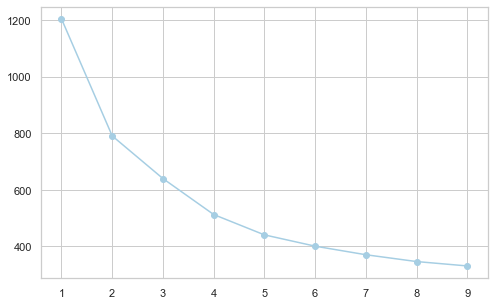

In [121]:
from sklearn.cluster import KMeans
from sklearn import cluster


K=range(1,10)
k_means = []
#On fait une boucle de 2 √† 9 pour tester toutes ces possibili√©ts
for k in K:
    #pour chaque k, on cr√©e un mod√®le et on l‚Äôajuste
    km=KMeans(n_clusters=k,init="k-means++").fit(X_cr)
     #on stocke l‚Äôinertie associ√©e
    k_means.append(km.inertia_)


#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), k_means, marker='o')
plt.show()

In [122]:
mycenters = pd.DataFrame({'groupe_km' : K, 'WSS' : k_means})
mycenters

groupe_km          WSS
0          1  1204.000000
1          2   790.498375
2          3   639.878353
3          4   512.893379
4          5   441.000063
5          6   401.076545
6          7   370.820961
7          8   346.731461
8          9   331.231449

Id√©alement, pour optimiser et ne pas perdre trop d'informations, il est conseill√© de choisir k = 5 .
 Un clustering  en 5 permettra de de comparer le partitionnement avec les groupes de la classification hi√©rarchique. Il est pertinent de comparer les deux m√©thodes sur le m√™me nombre de clusters.



In [123]:

#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_cr)
#R√©cup√©ration des clusters attribu√©s √† chaque individu (classes d'appartenance)
clusters_kmeans5 = cls5.labels_

cls5.cluster_centers_ 
#Afficher la position finale du centro√Øde


array([[-0.63005087,  0.56627013,  0.49577032,  0.33187291, -0.07556566,
         0.61747583, -0.57994548],
       [ 0.74888832, -0.90997414, -0.88578093, -1.03062249, -0.60494926,
         0.37160626, -0.69459862],
       [-0.25632475,  1.39844184,  1.46221397,  1.19930781,  2.47140183,
         0.40412155,  0.16966558],
       [-0.58355686,  0.24445737,  0.38278801,  0.84592793,  0.13153652,
        -1.1064191 ,  1.23541374],
       [ 0.93096789, -0.87508393, -0.96534375, -0.63268321, -0.56334764,
        -1.24138905,  1.22726642]])

On obtient donc un tableau de 5 lignes et 7 colonnes, pourquoi ?
Nous avons cinq groupes et sept variables.
**Pour r√©duire les dimensions, nous avons besoin de pca**

# Visualisation des clusters en ACP pour la projection des donn√©es


Le principe de **la r√©duction de dimension** est de r√©duire la complexit√© superflue d'un dataset en projetant ses donn√©es dans un espace de plus petite dimension .

Le principe  de **ACP** est de projeter nos donn√©es sur des axes appel√©s Composantes Principales, en cherchant √† minimiser la distance entre nos points et leur projections. De cette mani√®re on r√©duit la dimension pr√©servant au maximum la variance de nos donn√©es. Pour **Pr√©server un maximum de variance pour optenir la projection qu'il soit la plus fid√®le possible √† nos donn√©es.**
 
 Analyse Pour trouver les axes de projection (xp): 
 Pour faire √ßa dans point de vue math√©matique on
 1. On calcule la matrice de covariance des donn√©es 
 2. On d√©termine les vecteurs propres de cette matrice : ce sont les Composantes Principales 
 3. (On projette les donn√©es sur ces axes)
 


 
**L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appr√©hender le "comportement" des diff√©rents groupes.**

PCA est un transformer ! 
1. D√©finir le nombre de composantes 
2. Transformer les donn√©es avec fit transform()

Il y a deux cas possibles pour choisir le nombre de composantes sur lesquels projeter nos donn√©es? et bien :
1. Celui dans lequel vous cherchez √† visualiser vos donn√©es dans un espace de 2d ou 3D ,pour √ßa c'est tr√®s simple, le nombre de composants doit √™tre √©gale √† deux ou trois
2. Celui dans lequel vous cherchez √† compresser vos donn√©es pour acc√©l√©rer l'apprentissage de la machine sur des taches de classification ou de r√©gression, pour √ßa il faut choisir le nombre de composantes de telle sorte √† pr√©server entre 95 et 99 % de la variance de vos donn√©es.

### D√©finir le nombre de composantes 

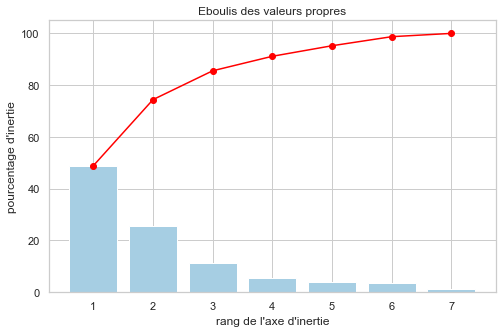

[ 48.85719311  74.40827835  85.55342329  91.15818575  95.23028109
  98.72806428 100.        ]


array([48.85719311, 25.55108525, 11.14514494,  5.60476246,  4.07209534,
        3.49778319,  1.27193572])

In [124]:
import pca as pca
from sklearn import decomposition
#Repr√©sentation de la variance expliqu√©e 
model_pca = decomposition.PCA().fit(X_cr)

#nous allons examiner quel est le pourcentage de variance pr√©server pour chacune de nos composantes.
scree = model_pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')   
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

#Pourcentage de variance expliqu√©e par les composantes principales √† l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree




Environ 70 % de la variance des donn√©es s'explique par ces deux premi√®res composantes.

La m√©thode du coude pr√©cise une forte repr√©sentation de nos variables sur les deux premi√®res composantes principales, le premier axe factoriel.

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


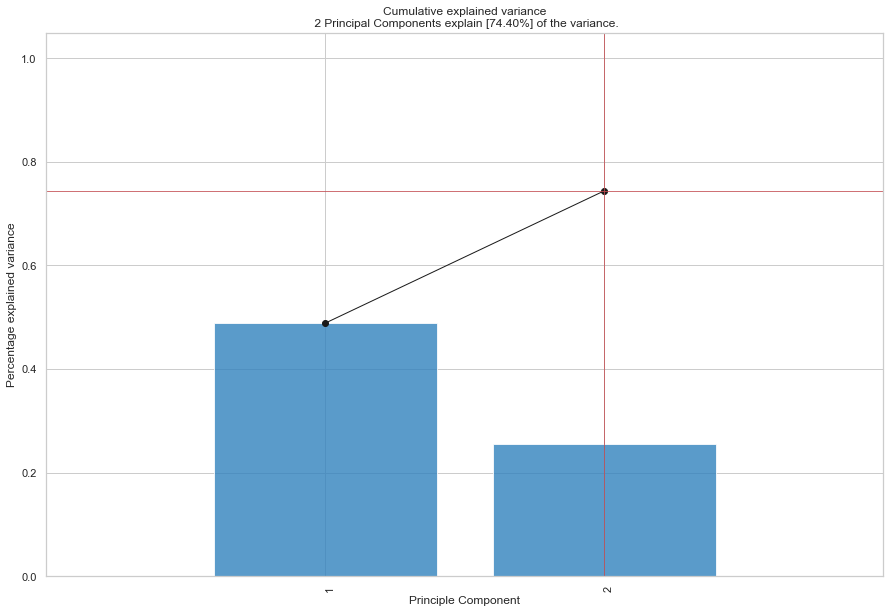

<Figure size 576x360 with 0 Axes>

[ 48.85719311  74.40827835  85.55342329  91.15818575  95.23028109
  98.72806428 100.        ]


array([48.85719311, 25.55108525, 11.14514494,  5.60476246,  4.07209534,
        3.49778319,  1.27193572])

In [125]:
from pca import pca
model_pca = pca(n_components=2)

results = model_pca.fit_transform(X_cr)

fig, ax = model_pca.plot()
plt.show()

#Pourcentage de variance expliqu√©e par les composantes principales √† l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree

[pca] >Plot PC1 vs PC2 with loadings.


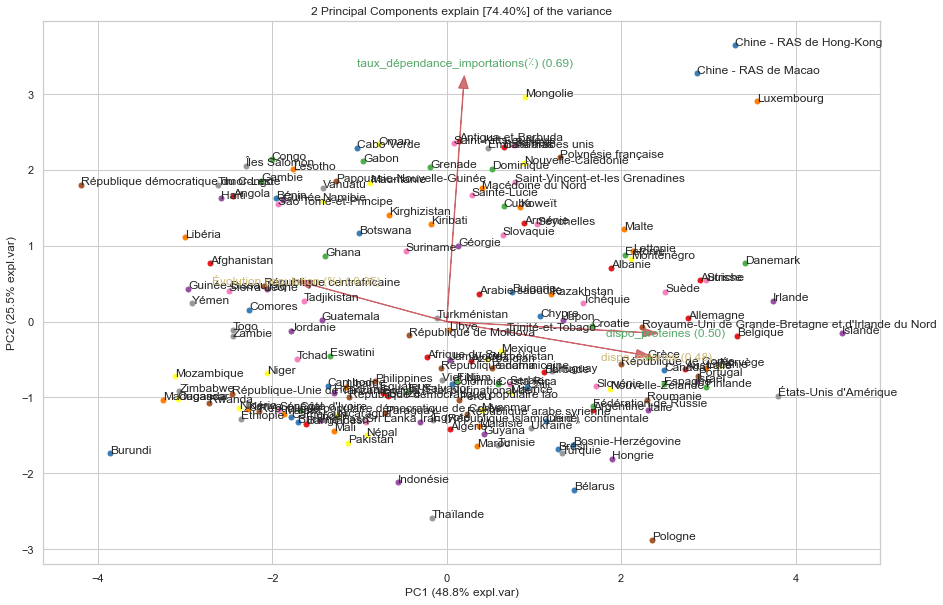

In [126]:
fig, ax = model_pca.biplot(n_feat=4, legend=None)

In [127]:
model_pca

In [128]:
model_pca.transform(X_cr)

[pca] >Processing dataframe..


PC1       PC2
Afghanistan           -2.717782  0.770299
Afrique du Sud        -0.220664 -0.472169
Albanie                1.886392  0.708115
Alg√©rie                0.040593 -1.419012
Allemagne              2.767122  0.045353
...                         ...       ...
√âmirats arabes unis    0.478370  2.289497
√âquateur              -0.765438 -0.890592
√âtats-Unis d'Am√©rique  3.798569 -0.974743
√âthiopie              -2.363048 -1.281446
√éles Salomon          -2.304912  2.052838

[172 rows x 2 columns]

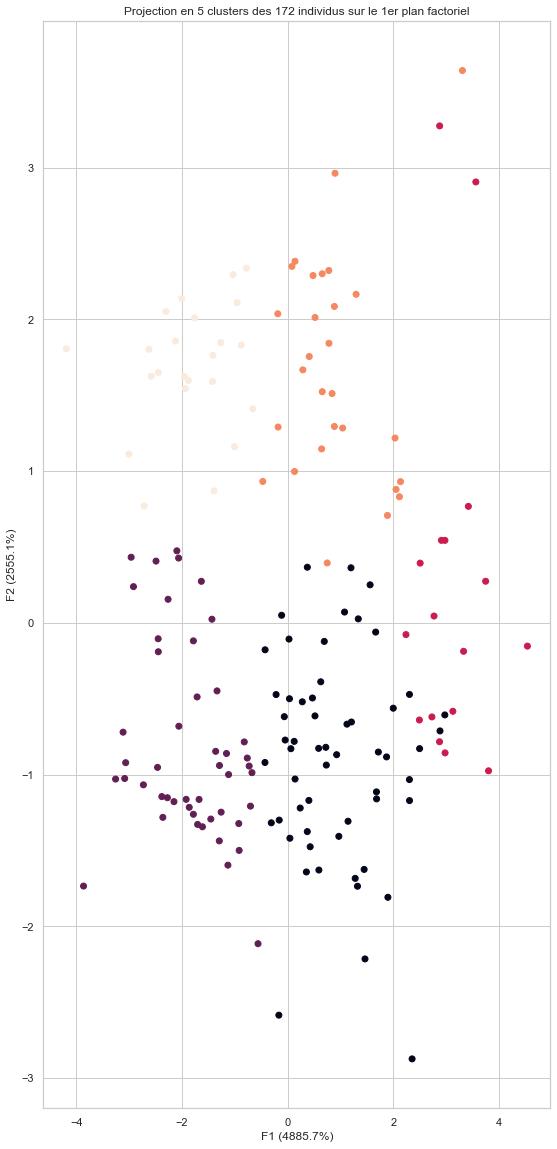

In [129]:
#Coordonn√©es factorielles 
model_pca = decomposition.PCA().fit(X_cr)
X_projected = model_pca.transform(X_cr)

plt.figure(figsize=(20,20))
plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls5.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("exports/projection_clusters.png")
plt.show()

L'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifi√©s lors du pr√©c√©dent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est n√©cessaire de caract√©riser chacun de ces groupes selon nos 8 variables. La position des centro√Ødes de chacun des groupes indiquera le ou les meilleurs clusters. C'est l'avantage de proc√©der en K-Means, afin d'obtenir directement des valeurs centr√©es et r√©duites, facilitant l'analyse. ‚¨áÔ∏è

In [130]:
#Tableau des Centro√Ødes 5 clusters dans sa version centr√©e r√©duite
#La comparaison est tout de suite simplifi√©e, les dimensions prenant la m√™me importance!
centroids = cls5.cluster_centers_
centroids


array([[-0.63005087,  0.56627013,  0.49577032,  0.33187291, -0.07556566,
         0.61747583, -0.57994548],
       [ 0.74888832, -0.90997414, -0.88578093, -1.03062249, -0.60494926,
         0.37160626, -0.69459862],
       [-0.25632475,  1.39844184,  1.46221397,  1.19930781,  2.47140183,
         0.40412155,  0.16966558],
       [-0.58355686,  0.24445737,  0.38278801,  0.84592793,  0.13153652,
        -1.1064191 ,  1.23541374],
       [ 0.93096789, -0.87508393, -0.96534375, -0.63268321, -0.56334764,
        -1.24138905,  1.22726642]])

In [131]:
pd.DataFrame(centroids, columns=df_clus.columns)

√âvolution population (%)  dispo_calories  dispo_proteines  \
0                 -0.630051        0.566270         0.495770   
1                  0.748888       -0.909974        -0.885781   
2                 -0.256325        1.398442         1.462214   
3                 -0.583557        0.244457         0.382788   
4                  0.930968       -0.875084        -0.965344   

   ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
0                     0.331873         -0.075566            0.617476   
1                    -1.030622         -0.604949            0.371606   
2                     1.199308          2.471402            0.404122   
3                     0.845928          0.131537           -1.106419   
4                    -0.632683         -0.563348           -1.241389   

   taux_d√©pendance_importations(Ÿ™)  
0                        -0.579945  
1                        -0.694599  
2                         0.169666  
3                         1.235414  
4                         1.227266

In [132]:
#Index tri√© des clusters
idk = np.argsort(cls5.labels_)
#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(df_clus.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'groupe_km'})
df_cls5

groupe_km                       pays
0            0                   Tch√©quie
1            0                   Colombie
2            0                     Panama
3            0                 Costa Rica
4            0                Ouzb√©kistan
..         ...                        ...
167          4                    Namibie
168          4                       Oman
169          4  Papouasie-Nouvelle-Guin√©e
170          4                     Guin√©e
171          4               √éles Salomon

[172 rows x 2 columns]

In [133]:
#Int√©gration des clusters dans notre dataframe "df_cls5" par la m√©thode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(df_clus, df_cls5, on='pays')
df_cls5

pays  √âvolution population (%)  dispo_calories  \
0              Afghanistan                      0.25          2273.0   
1           Afrique du Sud                      0.14          2898.0   
2                  Albanie                     -0.03          3338.0   
3                  Alg√©rie                      0.18          3493.0   
4                Allemagne                      0.03          3559.0   
..                     ...                       ...             ...   
167    √âmirats arabes unis                      0.19          3084.0   
168               √âquateur                      0.15          2563.0   
169  √âtats-Unis d'Am√©rique                      0.07          3862.0   
170               √âthiopie                      0.24          2439.0   
171           √éles Salomon                      0.23          2411.0   

     dispo_proteines  ratio_proteines_animales(%)  PIB_par_habitant  \
0              57.31                         0.18        469.919090   
1              79.77                         0.44       6001.389576   
2             116.02                         0.54       5303.197823   
3              90.84                         0.27       3975.510381   
4             104.24                         0.60      46231.563366   
..               ...                          ...               ...   
167            80.43                         0.44      43103.323058   
168            64.09                         0.51       6183.823825   
169           115.01                         0.66      65133.731652   
170            70.55                         0.09        827.544333   
171            52.85                         0.30       1944.818169   

     taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  groupe_km  
0              0.417910                         0.656716          4  
1              0.830741                         0.223239          0  
2              0.352941                         0.647059          3  
3              1.013937                         0.000000          0  
4              0.901869                         0.485397          2  
..                  ...                              ...        ...  
167            0.069337                         1.057011          3  
168            0.996805                         0.000000          1  
169            1.184659                         0.006375          2  
170            0.987179                         0.012821          1  
171            0.000000                         1.000000          4  

[172 rows x 9 columns]

In [134]:
df_cls5.head()

pays  √âvolution population (%)  dispo_calories  dispo_proteines  \
0     Afghanistan                      0.25          2273.0            57.31   
1  Afrique du Sud                      0.14          2898.0            79.77   
2         Albanie                     -0.03          3338.0           116.02   
3         Alg√©rie                      0.18          3493.0            90.84   
4       Allemagne                      0.03          3559.0           104.24   

   ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
0                         0.18        469.919090            0.417910   
1                         0.44       6001.389576            0.830741   
2                         0.54       5303.197823            0.352941   
3                         0.27       3975.510381            1.013937   
4                         0.60      46231.563366            0.901869   

   taux_d√©pendance_importations(Ÿ™)  groupe_km  
0                         0.656716          4  
1                         0.223239          0  
2                         0.647059          3  
3                         0.000000          0  
4                         0.485397          2

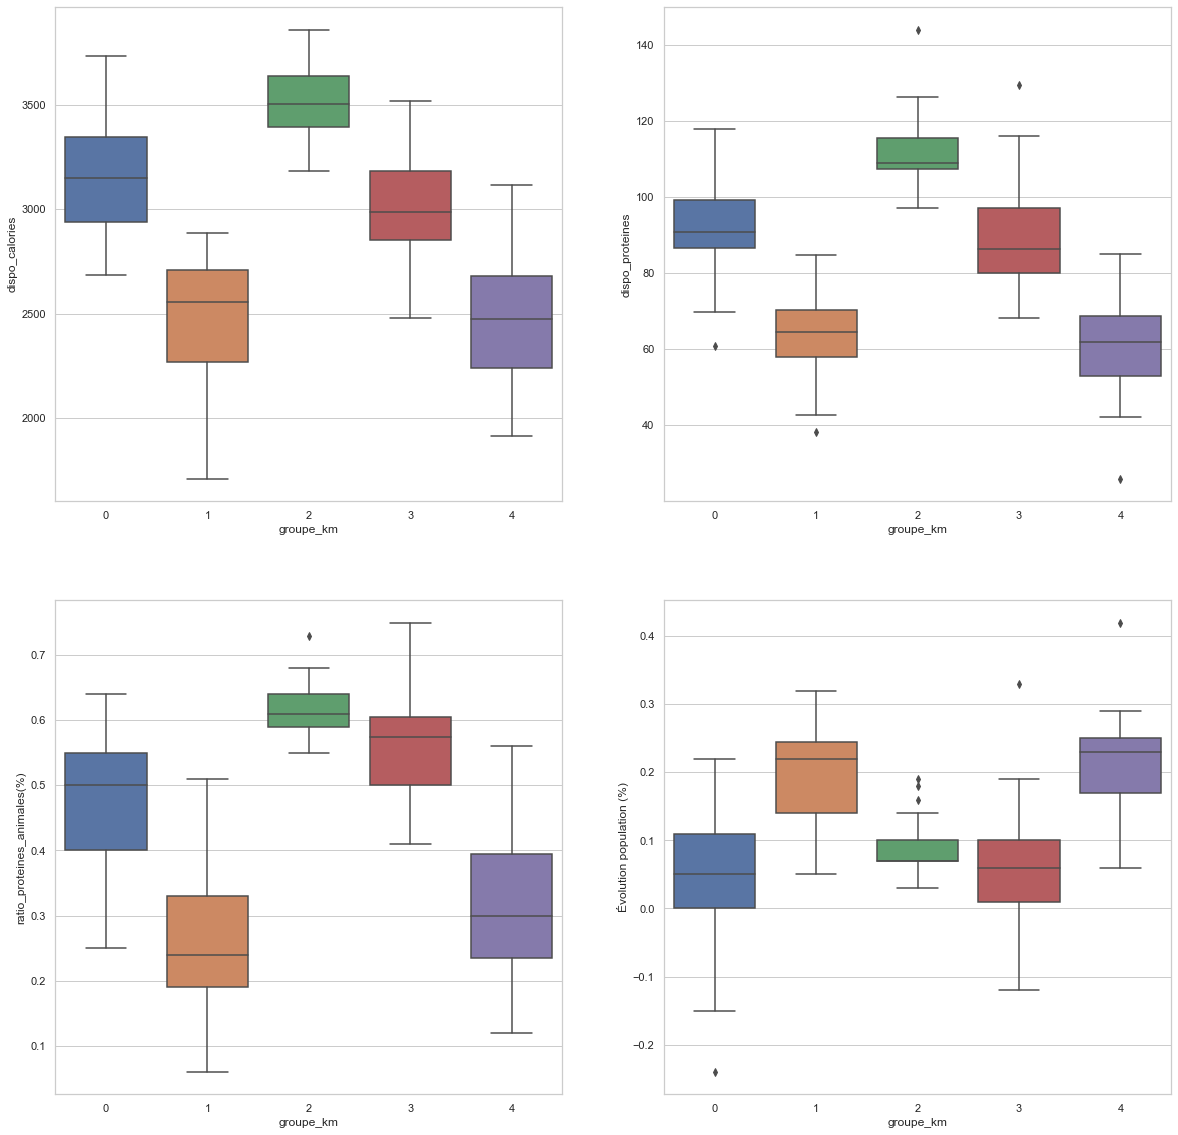

In [142]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='ratio_proteines_animales(%)')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='√âvolution population (%)')

plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

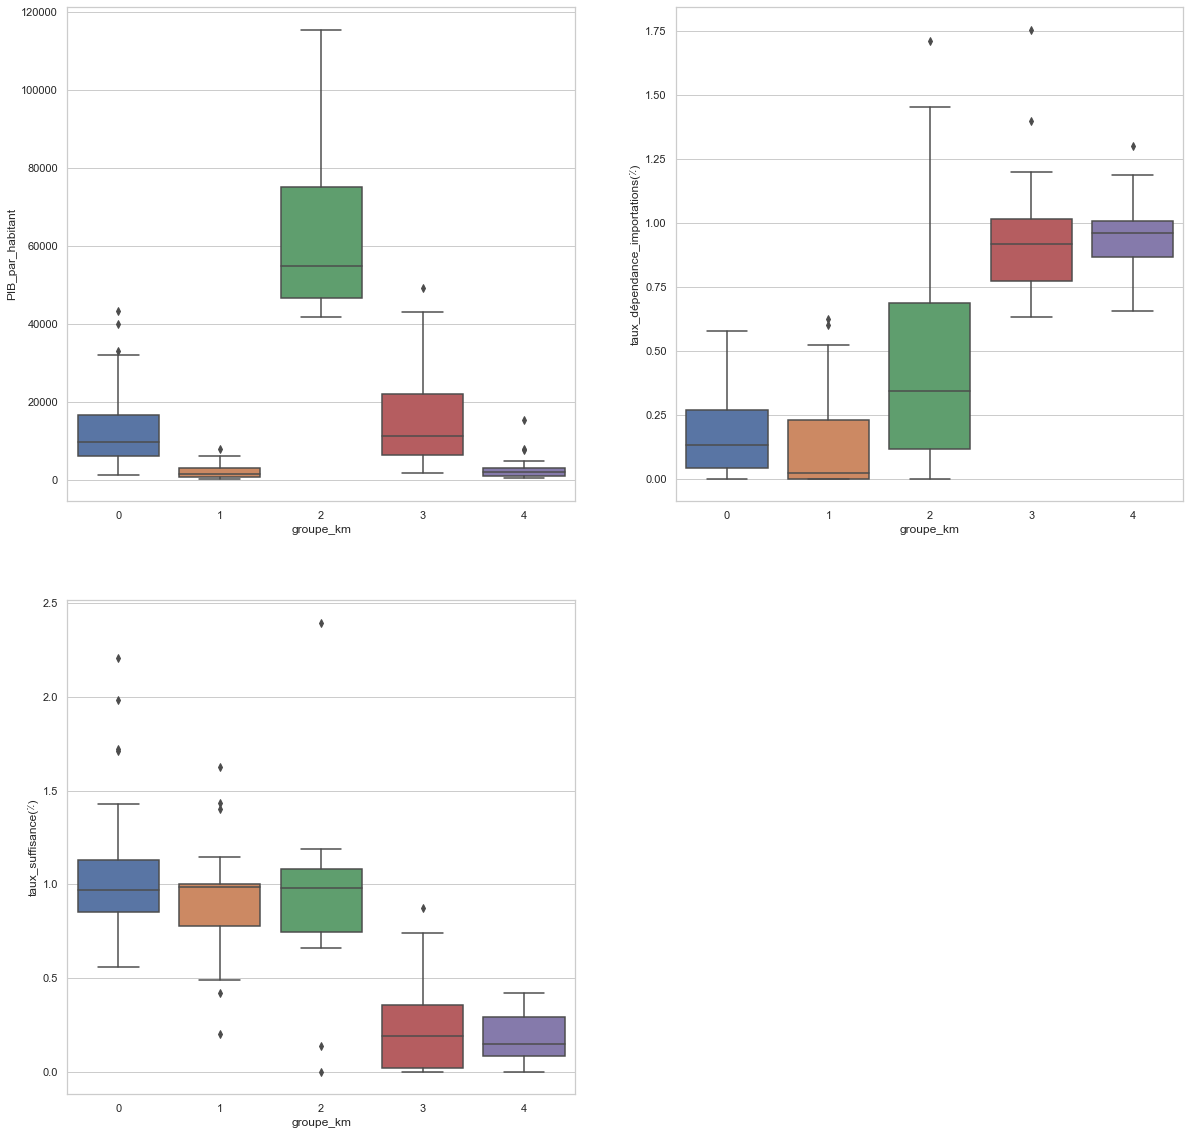

In [143]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='PIB_par_habitant')


plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_d√©pendance_importations(Ÿ™)')


plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_suffisance(Ÿ™)')


plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)



En se basant sur les m√™mes crit√®res que lors de la s√©lection des pays par CAH (√©volution importante de la population et bilan alimentaire trop faible), les clusters Kmeans √† selectionner sont  clusters0 et clusters 4

In [144]:
#Affichage des pays retenus dans ce clustering
#S√©lection selon l'importance du ratio des prot√©ines animales et dispo. calorique en r√©ponse 
#d'une probl√©matique cibl√©e sur le r√©gime alimentaire des pays
print('groupe 0')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 0]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 1')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 1]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 2')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 2]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 3')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 3]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 4')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 4]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')




groupe 0
----------
['Afrique du Sud' 'Alg√©rie' 'Arabie saoudite' 'Argentine' 'Azerba√Ødjan'
 'Barbade' 'Bosnie-Herz√©govine' 'Br√©sil' 'B√©larus' 'Chili'
 'Chine, continentale' 'Chypre' 'Colombie' 'Costa Rica' 'Croatie'
 'El Salvador' 'Espagne' 'Fidji' 'F√©d√©ration de Russie' 'Gr√®ce' 'Guyana'
 'Hongrie' "Iran (R√©publique islamique d')" 'Italie' 'Jama√Øque' 'Japon'
 'Kazakhstan' 'Libye' 'Lituanie' 'Malaisie' 'Maroc' 'Maurice' 'Mexique'
 'Myanmar' 'Nouvelle-Z√©lande' 'Ouzb√©kistan' 'Panama' 'Pologne' 'Portugal'
 'P√©rou' 'Roumanie' 'R√©publique arabe syrienne' 'R√©publique de Cor√©e'
 'R√©publique de Moldova' 'R√©publique dominicaine' 'Serbie' 'Slov√©nie'
 'Tch√©quie' 'Tha√Ølande' 'Trinit√©-et-Tobago' 'Tunisie' 'Turkm√©nistan'
 'Turquie' 'Ukraine' 'Uruguay' 'Viet Nam' '√âgypte']
------------------------------------------------------------
------------------------------------------------------------
groupe 1
----------
['Bangladesh' 'Belize' 'Bolivie (√âtat plurinational de)' 'Burkin

In [145]:
#La correspondance avec les groupes du partitionnement hi√©rarchique peut-√™tre analys√©e avec une m√©thode .crosstab()
pd.crosstab(clusters_cah, cls5.labels_)



col_0   0   1   2   3   4
row_0                    
1      50   0   0   5   0
2       3   0  17   2   0
3       4  47   0   0   3
4       0   0   0  19   0
5       0   0   0   2  20

In [146]:
#Cr√©ation d'un sous-ensemble avec s√©lection des pays des deux clusters 1 & 2 valid√©s
df_cls_subset = df_cls5.query('[3,2] in groupe_km') 
df_cls_subset.shape

(45, 9)

In [140]:
#Visualisation des premi√®res lignes de notre nouvel √©chantillon 
#Les correspondances des clusters sont bien int√©gr√©s‚Ä¶
df_cls_subset.head(19)


pays  √âvolution population (%)  dispo_calories  \
2                    Albanie                     -0.03          3338.0   
4                  Allemagne                      0.03          3559.0   
6         Antigua-et-Barbuda                      0.11          2485.0   
9                    Arm√©nie                      0.02          3022.0   
10                 Australie                      0.14          3417.0   
11                  Autriche                      0.07          3691.0   
13                   Bahamas                      0.10          2626.0   
16                  Belgique                      0.06          3800.0   
22                  Bulgarie                     -0.07          2854.0   
30                    Canada                      0.10          3539.0   
32  Chine - RAS de Hong-Kong                      0.07          3236.0   
33      Chine - RAS de Macao                      0.18          3312.0   
41                      Cuba                      0.01          3375.0   
43                  Danemark                      0.04          3421.0   
44                 Dominique                      0.01          2929.0   
47                   Estonie                     -0.01          3167.0   
50                  Finlande                      0.03          3320.0   
55                   Grenade                      0.06          2479.0   
61                   G√©orgie                     -0.03          2860.0   

    dispo_proteines  ratio_proteines_animales(%)  PIB_par_habitant  \
2            116.02                         0.54       5303.197823   
4            104.24                         0.60      46231.563366   
6             80.80                         0.64      17112.821135   
9             94.29                         0.56       4622.733216   
10           107.94                         0.68      54763.202388   
11           108.95                         0.59      49700.761833   
13            76.10                         0.64      34863.742098   
16           100.34                         0.60      46198.310321   
22            82.24                         0.50       9703.487814   
30           108.55                         0.56      46550.335507   
32           129.45                         0.75      49180.094302   
33           107.31                         0.64      84096.705446   
41            82.59                         0.41       9295.901636   
43           115.38                         0.66      60656.938517   
44            81.47                         0.55       8110.516934   
47           102.35                         0.63      23740.163796   
50           117.47                         0.62      48678.365212   
55            72.51                         0.59      10817.732726   
61            79.11                         0.42       4439.323978   

    taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  groupe_km  
2             0.352941                         0.647059          3  
4             0.901869                         0.485397          2  
6             0.000000                         1.000000          3  
9             0.218182                         0.781818          3  
10            1.028158                         0.007241          2  
11            0.745763                         0.638418          2  
13            0.272727                         1.136364          3  
16            2.395722                         1.711230          2  
22            0.677019                         0.689441          3  
30            0.978530                         0.116461          2  
32            0.043182                         1.756818          3  
33            0.136364                         1.454545          2  
41            0.078616                         0.924528          3  
43            1.082192                         0.972603          2  
44            0.000000                         1.000000          3  
47            0.689655          

In [141]:
#Visualisation des premi√®res lignes de notre nouvel √©chantillon 
#Les correspondances des clusters sont bien int√©gr√©s‚Ä¶
df_cls_subset['pays'].unique()

array(['Albanie', 'Allemagne', 'Antigua-et-Barbuda', 'Arm√©nie',
       'Australie', 'Autriche', 'Bahamas', 'Belgique', 'Bulgarie',
       'Canada', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Cuba', 'Danemark', 'Dominique', 'Estonie', 'Finlande', 'Grenade',
       'G√©orgie', 'Irlande', 'Islande', 'Isra√´l', 'Kiribati', 'Kowe√Øt',
       'Lettonie', 'Luxembourg', 'Mac√©doine du Nord', 'Malte', 'Mongolie',
       'Mont√©n√©gro', 'Norv√®ge', 'Nouvelle-Cal√©donie',
       'Polyn√©sie fran√ßaise',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
       'Sainte-Lucie', 'Samoa', 'Seychelles', 'Slovaquie', 'Suisse',
       'Suriname', 'Su√®de', '√âmirats arabes unis',
       "√âtats-Unis d'Am√©rique"], dtype=object)

Liste des pays et recommandations
Dans un premier temps, on sugg√®re donc de cibler les pays de l'UE, pour leur proximit√© et la facilit√© des √©changes commerciaux : l'Allemagne,  les Pays-Bas, la Su√®de ,Luxembourg et l'Italie.

Prudence avec le Royaume-Uni, puisqu'avec le Brexit, les √©changes commerciaux avec l'UE sont actuellement compliqu√©s. Pour autant, consid√©rant les int√©r√™ts √©conomiques mutuels, les r√©centes directives qui ont √©t√© prises pour favoriser ces √©changes sont en notre faveur.

Dans un second temps, on pourrait √©galement cibler les pays comme Hong Kong, le Japon, , ainsi que le Kowe√Øt.

FAO - Poultry production - March√©s et commerce
https://www.fao.org/poultry-production-products/aspects-socio-economiques/marches-et-commerce/fr/

"Le Br√©sil est le principal exportateur de viande de volaille, suivi par les √âtats-Unis et les Pays-Bas. Les principaux pays importateurs sont la Chine, le Japon, le Mexique et le Royaume-Uni."

"Les pays les moins avanc√©s sont de plus en plus d√©pendants des importations de viande de volaille. Le niveau de leurs importations est pass√© de 3 pour cent en 1961 √† environ 30 pour cent en 2013."

FAO - Poultry production

https://www.fao.org/poultry-production-products/production/fr/

"Les √âtats-Unis d'Am√©rique sont le plus grand producteur de viande de volaille √† l‚Äô√©chelle de la plan√®te: ils produisent en effet 17 pour cent de la production mondiale. Viennent ensuite la Chine et le Br√©sil."

"Pour r√©pondre √† la demande croissante, la production de viande de volaille mondiale a bondi, passant de 9 √† 132 millions de tonnes entre 1961 et 2019."

"En 2019, la viande de volaille repr√©sentait environ 39 pour cent de la production mondiale de viande."

"Dans les pays en d√©veloppement, environ 80 pour cent des m√©nages ruraux √©l√®vent des volailles."

# Tests statistiques
## Nos groupes sont-ils r√©ellement distincts?
### Test d'ad√©quation de Kolmogorov-Smirnov :
On peut tester l‚Äôad√©quation de la 'Disponibilit√© alimentaire de prot (g/personne/jour)' √† une loi normale √† l‚Äôaide de Kolmogorov-Smirnov. Le test sera doubl√© par celui de Shapiro-Wilk.

In [66]:
import scipy.stats as st
from scipy import stats
from scipy.stats import ks_2samp

### V√©rification des hypoth√®ses

**H0 = La variable suit donc  une loi normale .**

**H1 = La variable ne suit pas une loi normale.**

In [67]:
df_groupes_cah.head(1)

pays  √âvolution population (%)  dispo_calories  dispo_proteines  \
0  Afghanistan                      0.25          2273.0            57.31   

   ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
0                         0.18         469.91909             0.41791   

   taux_d√©pendance_importations(Ÿ™)  groupe_cah  
0                         0.656716           3

In [68]:
#Kolmogorov Smirnov test
stat, p= st.ks_2samp(df_groupes_cah['dispo_proteines'], 
            np.random.normal(df_groupes_cah['dispo_proteines'].mean(), 
                             df_groupes_cah['dispo_proteines'].std(ddof=0),
                             df_groupes_cah['dispo_proteines'].count()))

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interpr√©tation
alpha = 0.05
if p > alpha:
    print(' Nous pouvons accepter H0 pour des niveaux de test de 5¬†%')
else:
    print('H0 est rejet√©e √† un niveau de test de 5%')
    

Statistics=0.093, p=0.447
 Nous pouvons accepter H0 pour des niveaux de test de 5¬†%


### Test d'ad√©quation de Shapiro-Wilk :

*Recommand√© pour tester la normalit√© dans le cas de petits √©chantillons.

In [69]:
#creation of the df with only clusters 4 & 5
c4c5 = df_groupes_cah[(df_groupes_cah['groupe_cah'] == 3) | (df_groupes_cah['groupe_cah'] == 5)]

In [70]:
#conda install -c conda-forge pingouin
#Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. 

In [71]:
#normality of variables in c4c5
import pingouin as pg
pg.normality(c4c5, method='shapiro', alpha=0.05).drop('groupe_cah')



W          pval  normal
√âvolution population (%)         0.972905  1.031434e-01    True
dispo_calories                   0.974100  1.219575e-01    True
dispo_proteines                  0.979530  2.574547e-01    True
ratio_proteines_animales(%)      0.977172  1.868772e-01    True
PIB_par_habitant                 0.765521  1.125297e-09   False
taux_suffisance(Ÿ™)               0.923572  2.082295e-04   False
taux_d√©pendance_importations(Ÿ™)  0.829009  6.157860e-08   False

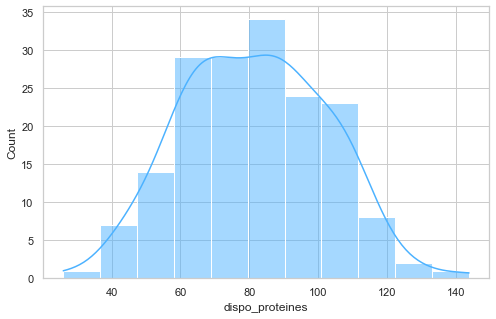

In [72]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_proteines', kde=True, color='#4cb2ff')
plt.show()

#### Disponibilit√© alimentaire √©nerg√©tique


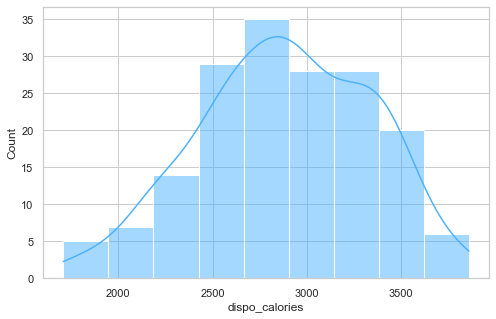

In [73]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_calories', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


In [74]:
#histogram
sns.histplot(data=df_groupes_cah, x='Evolution population (%)', kde=True, color='#4cb2ff')
plt.show()

ValueError: Could not interpret value `Evolution population (%)` for parameter `x`

#### Pourcentage de prot√©ine animale


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='ratio_proteines_animales', kde=True, color='#4cb2ff')
plt.show()

#### Produit Int√©rieur Brut


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='PIB par habitant', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='Production', kde=True, color='#4cb2ff')
plt.show()


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='taux_suffisance(Ÿ™)', kde=True, color='#4cb2ff')
plt.show()

### Test de comparaison de deux clusters dans le cas gaussien.



#### La variable 'dispo_proteines' suit une loi normale et sera par cons√©quent choisie pour le test.

In [ ]:
#On teste tout d‚Äôabord l‚Äô√©galit√© des variances √† l‚Äôaide de la commande
pg.homoscedasticity(c4c5, dv='dispo_proteines', 
                    group='groupe_cah', method='levene', 
                    alpha=0.05)

In [ ]:
#On teste ensuite l‚Äô√©galit√© des moyennes √† l‚Äôaide de la commande
pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
         df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5],
         paired=False,
        
         confidence=0.95)

### Conclusion

In [ ]:
Œ± = 0.05

if Œ± > pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
             df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5]).iloc[0,3] : 
    
    print("La p-value √©tant inf√©rieure au risque Œ±, on rejette donc H0, les moyennes des deux groupes sont diff√©rentes.")
else :
    print("La p-value √©tant sup√©rieur au risque Œ±, H0 est donc vrai, les moyennes des deux groupes sont √©gales.")